In [1]:
#Importing needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense,  BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Dropout
%matplotlib inline
tf.random.set_seed(42)
np.random.seed(42)

**YEAR 2O2O**

In [2]:
#Reading Year 2020 electricity demand data
df_2020 = pd.read_csv('demanddata_2020.csv')
df_2020.head(1)

SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0     01-JAN-2020                  1  26340  27153                 23821   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      1244                    6465   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  \
0                          0                    13080            0   

   PUMP_STORAGE_PUMPING  IFA_FLOW  IFA2_FLOW  BRITNED_FLOW  MOYLE_FLOW  \
0                    15      1703          0           852        -151   

   EAST_WEST_FLOW  NEMO_FLOW  NSL_FLOW  ELECLINK_FLOW  
0             -47        854         0              0

In [3]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   SETTLEMENT_DATE            17568 non-null  object
 1   SETTLEMENT_PERIOD          17568 non-null  int64 
 2   ND                         17568 non-null  int64 
 3   TSD                        17568 non-null  int64 
 4   ENGLAND_WALES_DEMAND       17568 non-null  int64 
 5   EMBEDDED_WIND_GENERATION   17568 non-null  int64 
 6   EMBEDDED_WIND_CAPACITY     17568 non-null  int64 
 7   EMBEDDED_SOLAR_GENERATION  17568 non-null  int64 
 8   EMBEDDED_SOLAR_CAPACITY    17568 non-null  int64 
 9   NON_BM_STOR                17568 non-null  int64 
 10  PUMP_STORAGE_PUMPING       17568 non-null  int64 
 11  IFA_FLOW                   17568 non-null  int64 
 12  IFA2_FLOW                  17568 non-null  int64 
 13  BRITNED_FLOW               17568 non-null  int64 
 14  MOYLE_

**IMPORTING WEATHER VARIABLES**

In [4]:
MeanTemp2020 = pd.read_csv('MeanTemp2020.csv')
MinTemp2020 = pd.read_csv('MinTemp2020.csv').round(2)
MaxTemp2020 = pd.read_csv('MaxTemp2020.csv')

In [5]:
#Joining the year 2020 demand with temperature parameters
df_2020 = pd.concat([df_2020,  MeanTemp2020['MEAN_TEMP'], 
                     MinTemp2020['MIN_TEMP'],MaxTemp2020['MAX_TEMP']], axis=1)
df_2020.head(1)

SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0     01-JAN-2020                  1  26340  27153                 23821   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      1244                    6465   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  ...  \
0                          0                    13080            0  ...   

   IFA2_FLOW  BRITNED_FLOW  MOYLE_FLOW  EAST_WEST_FLOW  NEMO_FLOW  NSL_FLOW  \
0          0           852        -151             -47        854         0   

   ELECLINK_FLOW  MEAN_TEMP  MIN_TEMP  MAX_TEMP  
0              0        5.2       3.1       7.4  

[1 rows x 22 columns]

**YEAR 2021**

In [6]:
#Reading Year 2021 electricity demand data
df_2021 = pd.read_csv('demanddata_2021.csv')
df_2021.head(1)

SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0     01-JAN-2021                  1  28354  28969                 26130   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      1018                    6527   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  \
0                          0                    13080            0   

   PUMP_STORAGE_PUMPING  IFA_FLOW  IFA2_FLOW  BRITNED_FLOW  MOYLE_FLOW  \
0                    14      2003         -1             0         215   

   EAST_WEST_FLOW  NEMO_FLOW  NSL_FLOW  ELECLINK_FLOW  
0             203        999         0              0

In [7]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   SETTLEMENT_DATE            17520 non-null  object
 1   SETTLEMENT_PERIOD          17520 non-null  int64 
 2   ND                         17520 non-null  int64 
 3   TSD                        17520 non-null  int64 
 4   ENGLAND_WALES_DEMAND       17520 non-null  int64 
 5   EMBEDDED_WIND_GENERATION   17520 non-null  int64 
 6   EMBEDDED_WIND_CAPACITY     17520 non-null  int64 
 7   EMBEDDED_SOLAR_GENERATION  17520 non-null  int64 
 8   EMBEDDED_SOLAR_CAPACITY    17520 non-null  int64 
 9   NON_BM_STOR                17520 non-null  int64 
 10  PUMP_STORAGE_PUMPING       17520 non-null  int64 
 11  IFA_FLOW                   17520 non-null  int64 
 12  IFA2_FLOW                  17520 non-null  int64 
 13  BRITNED_FLOW               17520 non-null  int64 
 14  MOYLE_

**IMPORTING WEATHER VARIABLES FOR YEAR 2021**

In [8]:
MeanTemp2021 = pd.read_csv('MeanTemp2021.csv')
MinTemp2021 = pd.read_csv('MinTemp2021.csv').round(2)
MaxTemp2021 = pd.read_csv('MaxTemp2021.csv')

In [9]:
#Joining the year 2021 demand with temperature parameters
df_2021 = pd.concat([df_2021,  MeanTemp2021['MEAN_TEMP'], MinTemp2021['MIN_TEMP'],MaxTemp2021['MAX_TEMP']], axis=1)
df_2021.head(1)

SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0     01-JAN-2021                  1  28354  28969                 26130   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      1018                    6527   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  ...  \
0                          0                    13080            0  ...   

   IFA2_FLOW  BRITNED_FLOW  MOYLE_FLOW  EAST_WEST_FLOW  NEMO_FLOW  NSL_FLOW  \
0         -1             0         215             203        999         0   

   ELECLINK_FLOW  MEAN_TEMP  MIN_TEMP  MAX_TEMP  
0              0       -0.0      -3.6       3.6  

[1 rows x 22 columns]

**YEAR 2022**

In [10]:
#Reading Year 2022 electricity demand data
df_2022 = pd.read_csv('demanddata_2022.csv')
df_2022.head(1)

SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0      2022-01-01                  1  21940  23275                 20513   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      2412                    6527   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  \
0                          0                    13670            0   

   PUMP_STORAGE_PUMPING  IFA_FLOW  IFA2_FLOW  BRITNED_FLOW  MOYLE_FLOW  \
0                   450      -181         -4           586         320   

   EAST_WEST_FLOW  NEMO_FLOW  NSL_FLOW  ELECLINK_FLOW  
0             384       -100       210              0

In [11]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   SETTLEMENT_DATE            17520 non-null  object
 1   SETTLEMENT_PERIOD          17520 non-null  int64 
 2   ND                         17520 non-null  int64 
 3   TSD                        17520 non-null  int64 
 4   ENGLAND_WALES_DEMAND       17520 non-null  int64 
 5   EMBEDDED_WIND_GENERATION   17520 non-null  int64 
 6   EMBEDDED_WIND_CAPACITY     17520 non-null  int64 
 7   EMBEDDED_SOLAR_GENERATION  17520 non-null  int64 
 8   EMBEDDED_SOLAR_CAPACITY    17520 non-null  int64 
 9   NON_BM_STOR                17520 non-null  int64 
 10  PUMP_STORAGE_PUMPING       17520 non-null  int64 
 11  IFA_FLOW                   17520 non-null  int64 
 12  IFA2_FLOW                  17520 non-null  int64 
 13  BRITNED_FLOW               17520 non-null  int64 
 14  MOYLE_

**IMPORTING WEATHER VARIABLES FOR YEAR 2022**

In [12]:
MeanTemp2022 = pd.read_csv('MeanTemp2022.csv')
MinTemp2022 = pd.read_csv('MinTemp2022.csv')
MaxTemp2022 = pd.read_csv('MaxTemp2022.csv')

In [13]:
#Joining the year 2022n electricity demand with temperature parameters
df_2022 = pd.concat([df_2022,  MeanTemp2022['MEAN_TEMP'], MinTemp2022['MIN_TEMP'],MaxTemp2022['MAX_TEMP']], axis=1)
df_2022.head(1)

SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0      2022-01-01                  1  21940  23275                 20513   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      2412                    6527   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  ...  \
0                          0                    13670            0  ...   

   IFA2_FLOW  BRITNED_FLOW  MOYLE_FLOW  EAST_WEST_FLOW  NEMO_FLOW  NSL_FLOW  \
0         -4           586         320             384       -100       210   

   ELECLINK_FLOW  MEAN_TEMP  MIN_TEMP  MAX_TEMP  
0              0       12.7      10.9      14.5  

[1 rows x 22 columns]

<div class="alert alert-block alert-info">
    
 <span style='font-family:Times New Roman'>**DATA CLEANING**
    </div>

**MERGING THE THREE YEARS TO FORM A DATAFRAME**

In [14]:
demanddata_df = pd.concat([df_2020, df_2021, df_2022], axis=0, ignore_index = True )
demanddata_df.head(1)

SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0     01-JAN-2020                  1  26340  27153                 23821   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      1244                    6465   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  ...  \
0                          0                    13080            0  ...   

   IFA2_FLOW  BRITNED_FLOW  MOYLE_FLOW  EAST_WEST_FLOW  NEMO_FLOW  NSL_FLOW  \
0          0           852        -151             -47        854         0   

   ELECLINK_FLOW  MEAN_TEMP  MIN_TEMP  MAX_TEMP  
0              0        5.2       3.1       7.4  

[1 rows x 22 columns]

**ADDING THE PRECIPITATION DATASET TO THE ELECTRICITY DEMAND DATASET**

In [15]:
uk_rainfall = pd.read_csv('Rainfall.csv')
uk_rainfall.head(1)

Date  RAINFALL  HALFHOUR_PERIOD
0  2020-01-01 00:00:00      0.75                1

In [16]:
demanddata_df = pd.concat([demanddata_df,  uk_rainfall['RAINFALL']], axis=1)

In [17]:
demanddata_df.rename(columns = {'RAINFALL': 'PRECIPITATION'}, inplace = True)

In [18]:
demanddata_df.shape

(52608, 23)

**CHECKING MIDDLE PORTION OF THE MERGED DATAFRAME**

In [19]:
#Dividing length of dataframe by 2
middle_data = len(demanddata_df) // 2

if middle_data % 2 == 0:
    middle_demanddata = demanddata_df.iloc[middle_data-1:middle_data+10]
else:
    middle_demanddata = demanddata_df.iloc[middle_data:middle_data+10]
middle_demanddata

SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
26303     02-JUL-2021                  2  21635  23336                 19610   
26304     02-JUL-2021                  3  21255  22895                 19291   
26305     02-JUL-2021                  4  20917  22524                 18995   
26306     02-JUL-2021                  5  20667  22440                 18774   
26307     02-JUL-2021                  6  20369  22495                 18493   
26308     02-JUL-2021                  7  20308  22404                 18439   
26309     02-JUL-2021                  8  20170  22256                 18273   
26310     02-JUL-2021                  9  20110  22075                 18241   
26311     02-JUL-2021                 10  19906  21978                 18075   
26312     02-JUL-2021                 11  20343  22045                 18474   
26313     02-JUL-2021                 12  20955  22560                 19033   

       EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
26303                       276                    6527   
26304                       262                    6527   
26305                       247                    6527   
26306                       239                    6527   
26307                       231                    6527   
26308                       224                    6527   
26309                       216                    6527   
26310                       227                    6527   
26311                       237                    6527   
26312                       239                    6527   
26313                       241                    6527   

       EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  ...  \
26303                          0                    13080            0  ...   
26304                          0                    13080            0  ...   
26305                          0                    13080            0  ...   
26306                          0                    13080            0  ...   
26307                          0                    13080            0  ...   
26308                          0                    13080            0  ...   
26309                          0                    13080            0  ...   
26310                          0                    13080            0  ...   
26311                          0                    13080            0  ...   
26312                         34                    13080            0  ...   
26313                        187                    13080            0  ...   

       BRITNED_FLOW  MOYLE_FLOW  EAST_WEST_FLOW  NEMO_FLOW  NSL_FLOW  \
26303           392        -216               0        901        -8   
26304           392        -210               0        901        -8   
26305           392        -178               0        901        -8   
26306           391        -323               0        901        -8   
26307           391        -420               0        901        -8   
26308           391        -396               0        901        -8   
26309           391        -448             -28        901        -8   
26310           391        -349             -12        855        -8   
26311           393        -330            -107        853        -8   
26312           798        -191             -21        843        -2   
26313           809        -127               0        842        -1   

       ELECLINK_FLOW  MEAN_TEMP  MIN_TEMP  MAX_TEMP  PRECIPITATION  
26303              0      17.26     12.05     22.47           3.88  
26304              0      17.30     12.10     22.50           3.94  
26305              0      17.31     12.15     22.47           4.13  
26306              0      17.32     12.20     22.43           4.31  
26307              0      17.33     12.26     22.40           4.49  
26308              0      17.34     12.31     22.37           4.68  
26309              0      17.35     12.

In [20]:
#demanddata_df.columns

**DROPPING REDUNDANT COLUMNS**

In [21]:
columns = demanddata_df[['TSD', 'NON_BM_STOR',
       'PUMP_STORAGE_PUMPING', 'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW',
       'MOYLE_FLOW', 'EAST_WEST_FLOW', 'NEMO_FLOW', 'NSL_FLOW',
       'ELECLINK_FLOW', 'ENGLAND_WALES_DEMAND']]
demanddata_df = demanddata_df.drop(columns, axis =1)

In [22]:
#Remnaming columns
column_rename = {'SETTLEMENT_DATE': 'DATE.', 'SETTLEMENT_PERIOD': 'HALFHOUR_PERIOD', 'ND': 'NATIONAL_DEMAND'}
demanddata_df = demanddata_df.rename(columns=column_rename)
demanddata_df.head(1)

DATE.  HALFHOUR_PERIOD  NATIONAL_DEMAND  EMBEDDED_WIND_GENERATION  \
0  01-JAN-2020                1            26340                      1244   

   EMBEDDED_WIND_CAPACITY  EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  \
0                    6465                          0                    13080   

   MEAN_TEMP  MIN_TEMP  MAX_TEMP  PRECIPITATION  
0        5.2       3.1       7.4           0.75

In [23]:
#checking for duplicates
demanddata_df.duplicated().sum()

0

**Extracting and Adding Year, Month and Weekday to the dataset**

In [25]:
demanddata_df['YEAR'] = pd.DatetimeIndex(demanddata_df['DATE.']).year
demanddata_df['MONTH'] = pd.DatetimeIndex(demanddata_df['DATE.']).month
demanddata_df['DATE'] = pd.to_datetime(demanddata_df['DATE.']).dt.date
demanddata_df['DAY'] = pd.DatetimeIndex(demanddata_df['DATE.']).dayofweek
demanddata_df['DAY_NAME'] = pd.to_datetime(demanddata_df['DATE.']).dt.day_name()
demanddata_df['DAY_OF_MONTH'] = pd.to_datetime(demanddata_df['DATE.']).dt.day


demanddata_df = demanddata_df.set_index('DATE.')
demanddata_df.index = pd.to_datetime(demanddata_df.index)

demanddata_df.head(1)

HALFHOUR_PERIOD  NATIONAL_DEMAND  EMBEDDED_WIND_GENERATION  \
DATE.                                                                    
2020-01-01                1            26340                      1244   

            EMBEDDED_WIND_CAPACITY  EMBEDDED_SOLAR_GENERATION  \
DATE.                                                           
2020-01-01                    6465                          0   

            EMBEDDED_SOLAR_CAPACITY  MEAN_TEMP  MIN_TEMP  MAX_TEMP  \
DATE.                                                                
2020-01-01                    13080        5.2       3.1       7.4   

            PRECIPITATION  YEAR  MONTH        DATE  DAY   DAY_NAME  \
DATE.                                                                
2020-01-01           0.75  2020      1  2020-01-01    2  Wednesday   

            DAY_OF_MONTH  
DATE.                     
2020-01-01             1

In [26]:
#Adjusting the data by replacing numerical representations of months with their actual names.
demanddata_df['MONTH_NAME']= demanddata_df['MONTH'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 
                                                    7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 
                                                    12:'December'})

In [28]:
demanddata_df.describe().round(1)

HALFHOUR_PERIOD  NATIONAL_DEMAND  EMBEDDED_WIND_GENERATION  \
count          52608.0          52608.0                   52608.0   
mean              24.5          27374.4                    1719.4   
std               13.9           6329.4                    1076.2   
min                1.0          13367.0                     181.0   
25%               12.8          22445.0                     846.0   
50%               24.5          26621.5                    1466.0   
75%               36.2          31332.2                    2388.0   
max               50.0          46433.0                    5354.0   

       EMBEDDED_WIND_CAPACITY  EMBEDDED_SOLAR_GENERATION  \
count                 52608.0                    52608.0   
mean                   6528.4                     1365.4   
std                      19.7                     2108.6   
min                    6465.0                        0.0   
25%                    6527.0                        0.0   
50%                    6527.0                        8.0   
75%                    6545.0                     2230.0   
max                    6574.0                     9680.0   

       EMBEDDED_SOLAR_CAPACITY  MEAN_TEMP  MIN_TEMP  MAX_TEMP  PRECIPITATION  \
count                  52608.0    52608.0   52608.0   52608.0        52608.0   
mean                   13325.1       10.7       6.8      14.7            9.5   
std                      348.9        5.2       4.8       5.9            9.5   
min                    13080.0       -4.4      -9.3      -0.4            0.0   
25%                    13080.0        6.8       3.1      10.4            2.1   
50%                    13080.0       10.6       6.7      14.5            6.8   
75%                    13770.0       14.9      10.6      19.2           14.3   
max                    13861.0       28.1      18.9      37.3           96.3   

          YEAR    MONTH      DAY  DAY_OF_MONTH  
count  52608.0  52608.0  52608.0       52608.0  
mean    2021.0      6.5      3.0          15.7  
std        0.8      3.4      2.0           8.8  
min     2020.0      1.0      0.0           1.0  
25%     2020.0      4.0      1.0           8.0  
50%     2021.0      7.0      3.0          16.0  
75%     2022.0     10.0      5.0          23.0  
max     2022.0     12.0      6.0          31.0

# DATA VISUALIZATIONS

**FEATURES**

>**England_Wales_Demand:** This is the England and Wales electricity generation requirement (MW).

>**Embedded_Wind_Generation:** This is the UK wind generation from wind farms (MW). Their effect is to suppress the electricity demand during periods of high wind.

>**Embedded_Wind_Capacity:** This is National Grid ESO’s best view of the installed embedded wind capacity in UK (MW).

>**Embedded_Solar_Generation:** This is an estimate of the UK solar generation from PV panels (MW). Their effect is to suppress the electricity demand during periods of high radiation.

>**Embedded_Solar_Capacity:** This is National Grid ESO’s best view of the installed embedded solar capacity in UK (MW).

>**Mean_Temp:** Average temperature in the UK (°C).

>**Max_Temp:** Maximum temperature in the UK (°C).

>**Min_Temp:** Minimum temperature in the UK (°C).

>**Rainfall:** indicates the quantity of rain falling (MM)


**TARGET**

>**National_Demand:** This is the UK generation requirement and is equivalent to the Initial National Demand Outturn (INDO) and National Demand Forecast.

In [29]:

def timeseries(df = None, column = None, series = pd.Series([]), label = None, ylabel = None, title = None, start = 0, end = None):

    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('DATE.', fontsize=16)

    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

C:\Users\User\AppData\Local\Temp\ipykernel_5788\1949672060.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def timeseries(df = None, column = None, series = pd.Series([]), label = None, ylabel = None, title = None, start = 0, end = None):


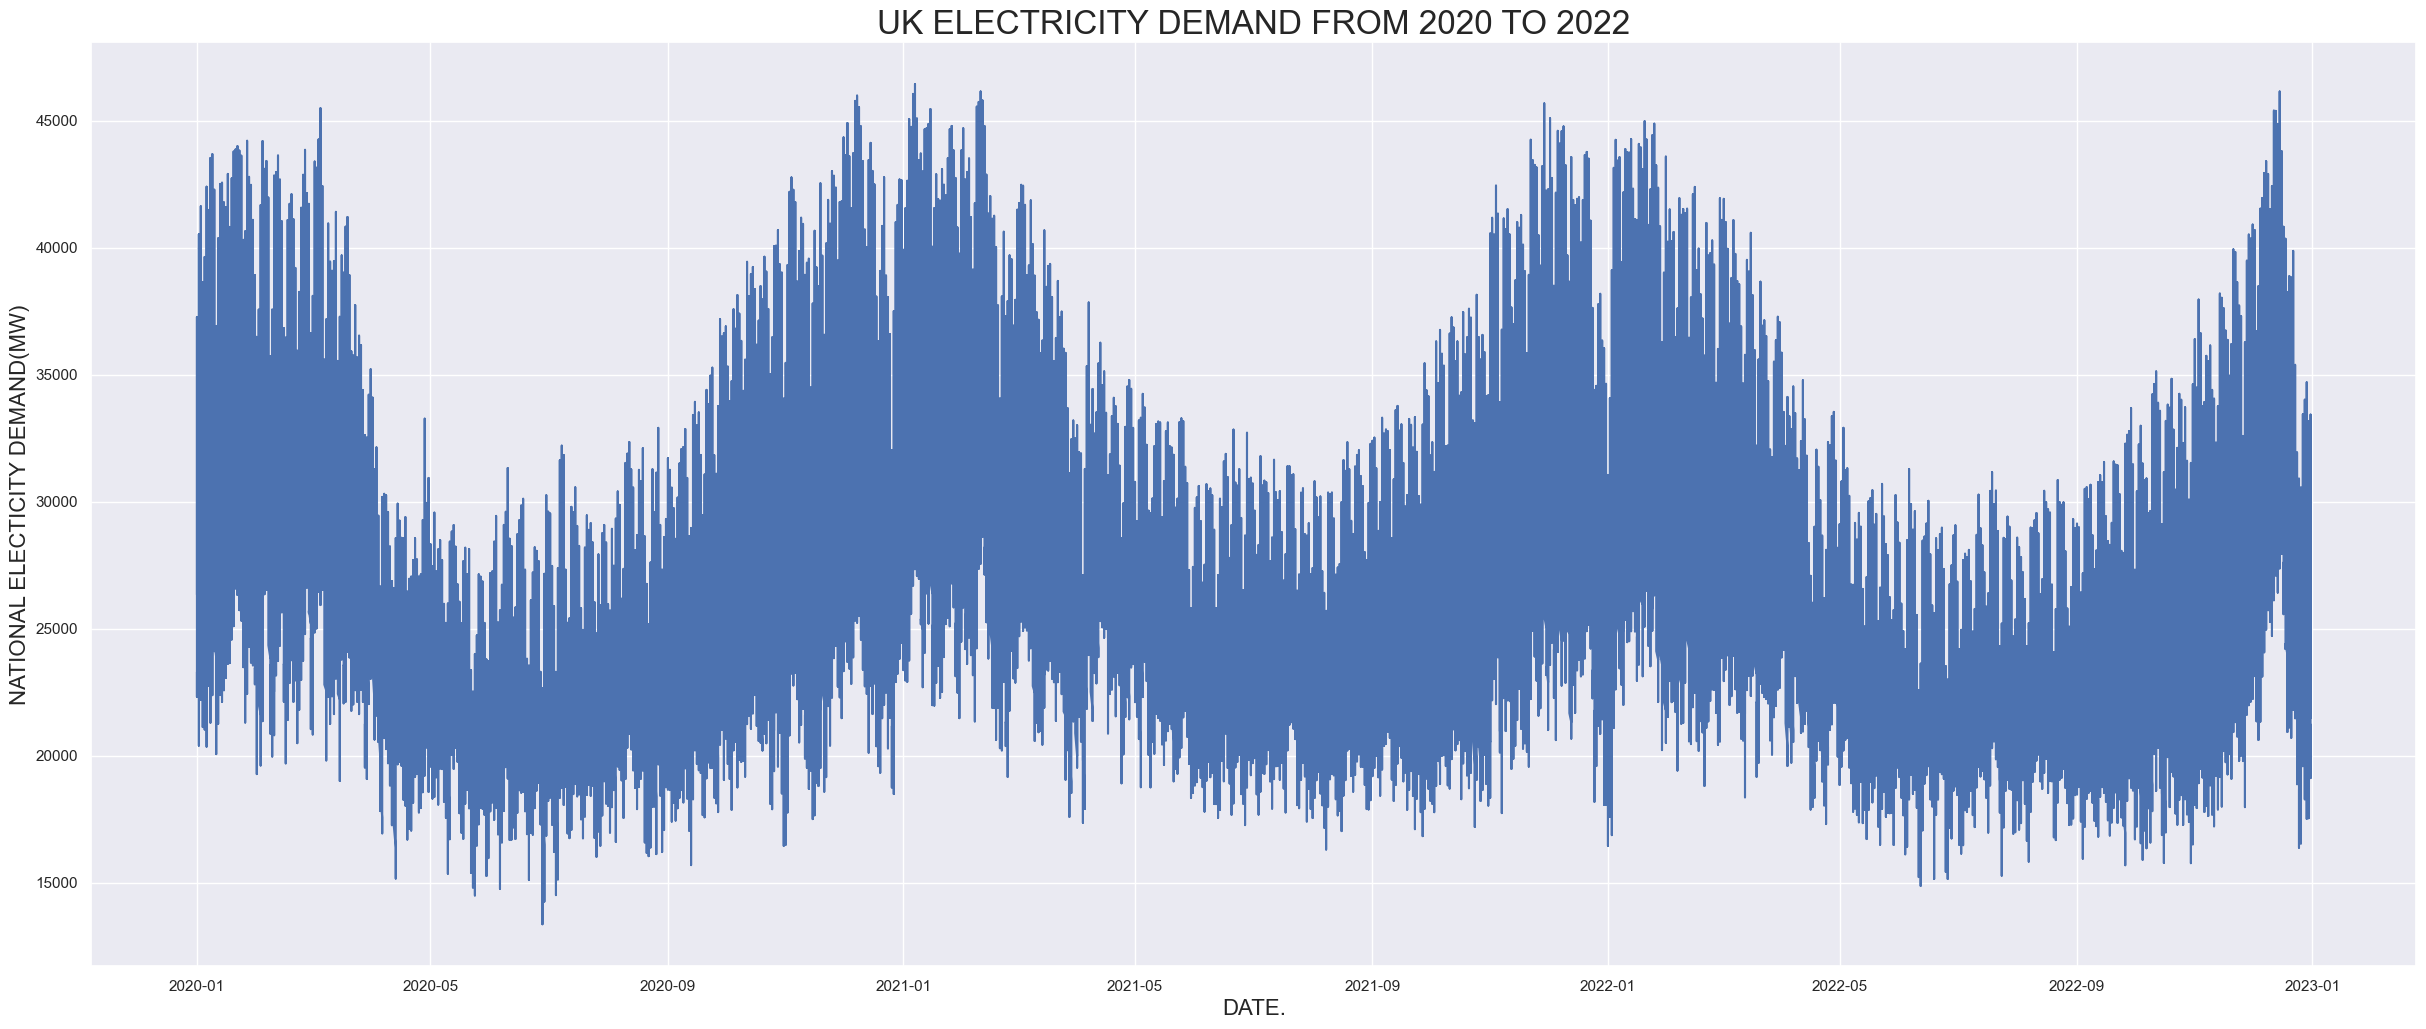

In [30]:
#Plotting UK electricity demand from 2020 to 2022
ax = timeseries(df=demanddata_df, column='NATIONAL_DEMAND', 
                  ylabel='NATIONAL ELECTICITY DEMAND(MW)',
                 title='UK ELECTRICITY DEMAND FROM 2020 TO 2022')
plt.show()

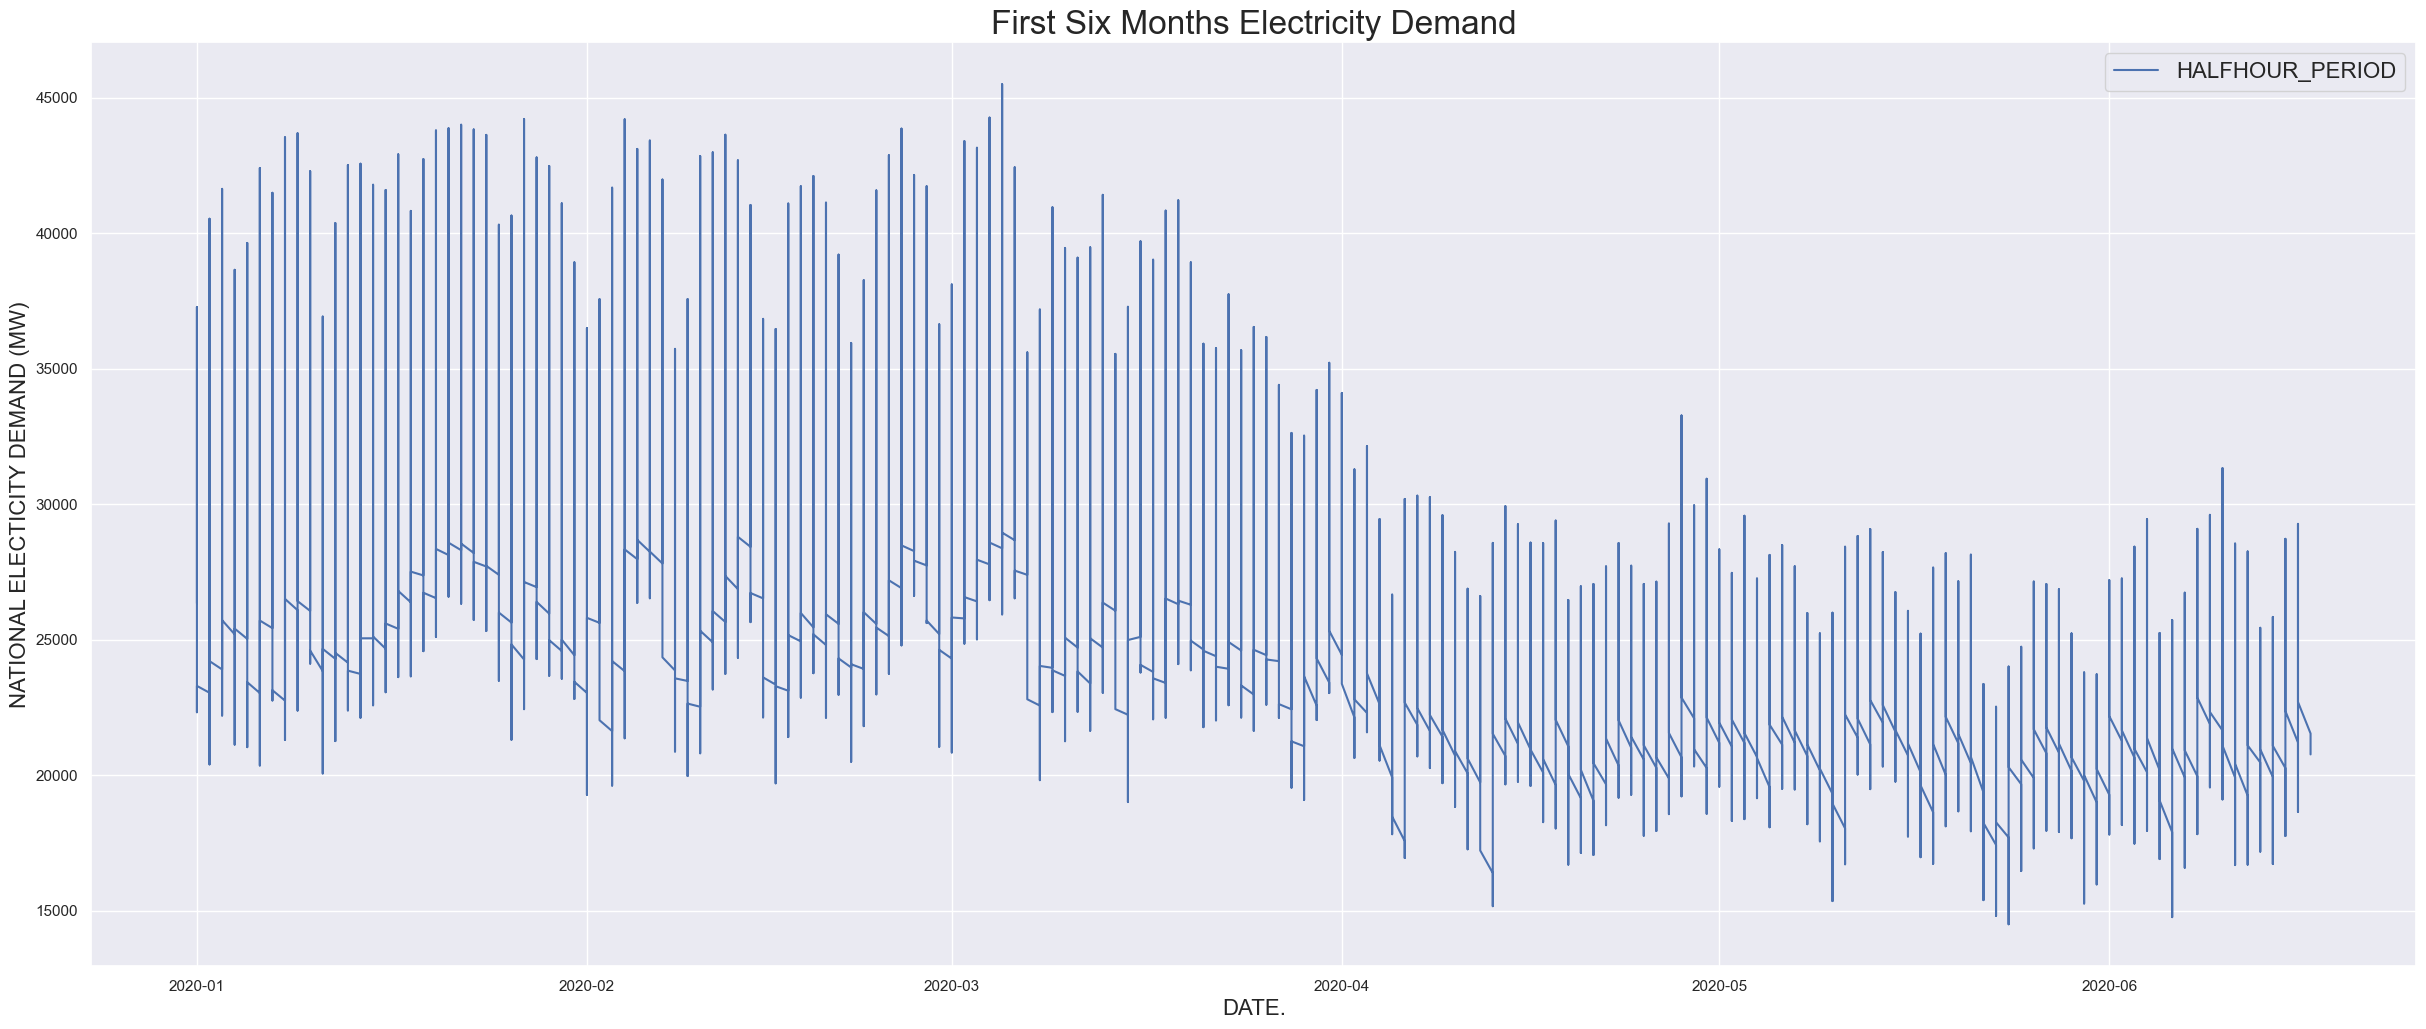

In [31]:
#First six months electricity demand 
ax = timeseries(df=demanddata_df, column='NATIONAL_DEMAND', label = 'HALFHOUR_PERIOD', ylabel='NATIONAL ELECTICITY DEMAND (MW)',
                 title='First Six Months Electricity Demand', end=48*7*24)
plt.show()

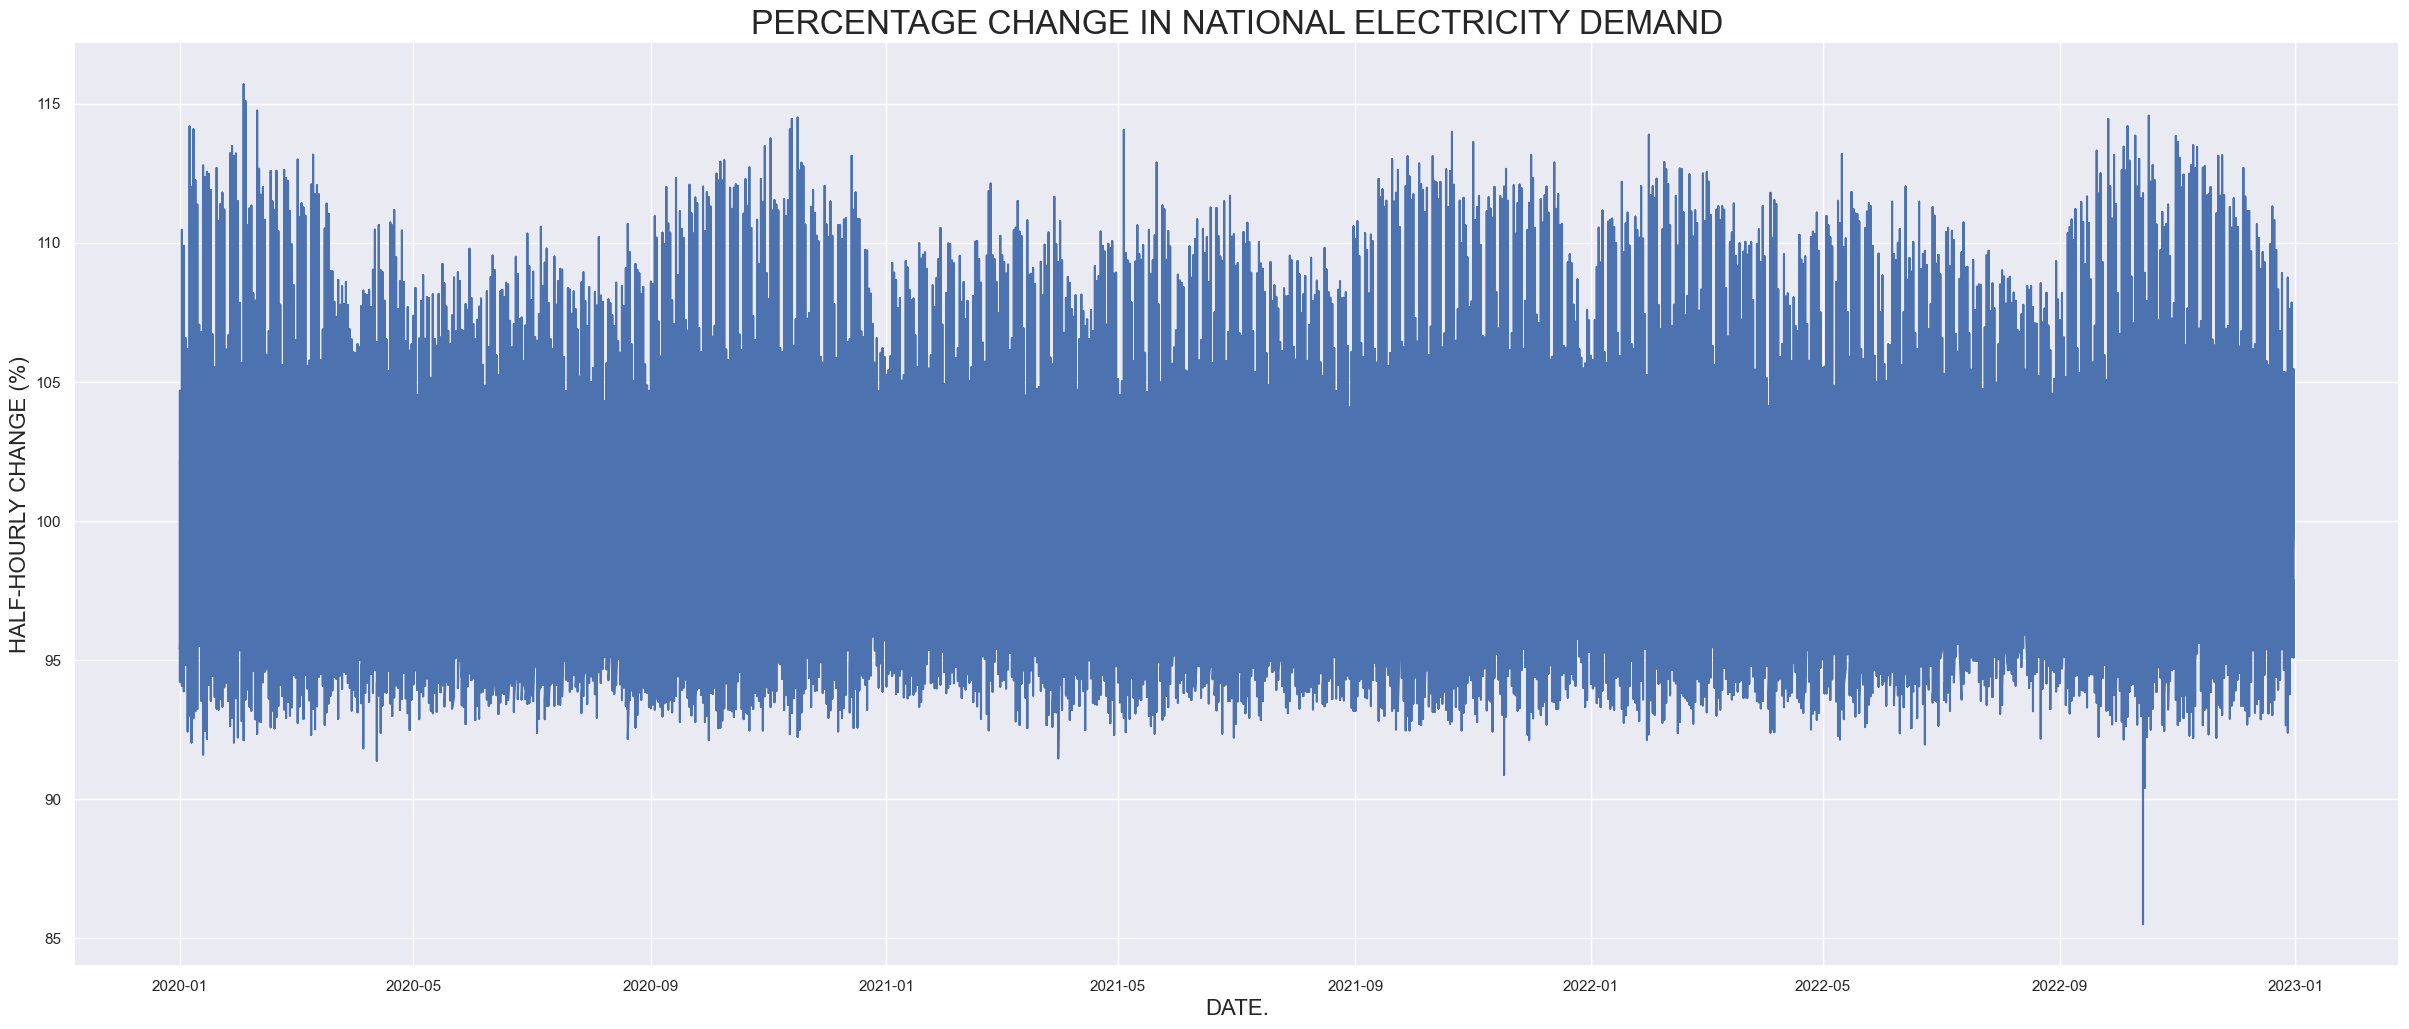

In [32]:
#Plotting the percentage change in electricity demand
change = demanddata_df['NATIONAL_DEMAND'].div(demanddata_df['NATIONAL_DEMAND']
                                              .shift(1)).mul(100)
ax = timeseries(series=change, ylabel='HALF-HOURLY CHANGE (%)', 
                 title='PERCENTAGE CHANGE IN NATIONAL ELECTRICITY DEMAND')
plt.show()

**From the figure above, we can see that the change in the electricity within 30-minutes interval is usually between -10% (actual demand * 0.90) and +10% (actual demand * 1.10). However, there are also very few outliers which show that the price gets above +10% (+110% to 115% and above)**

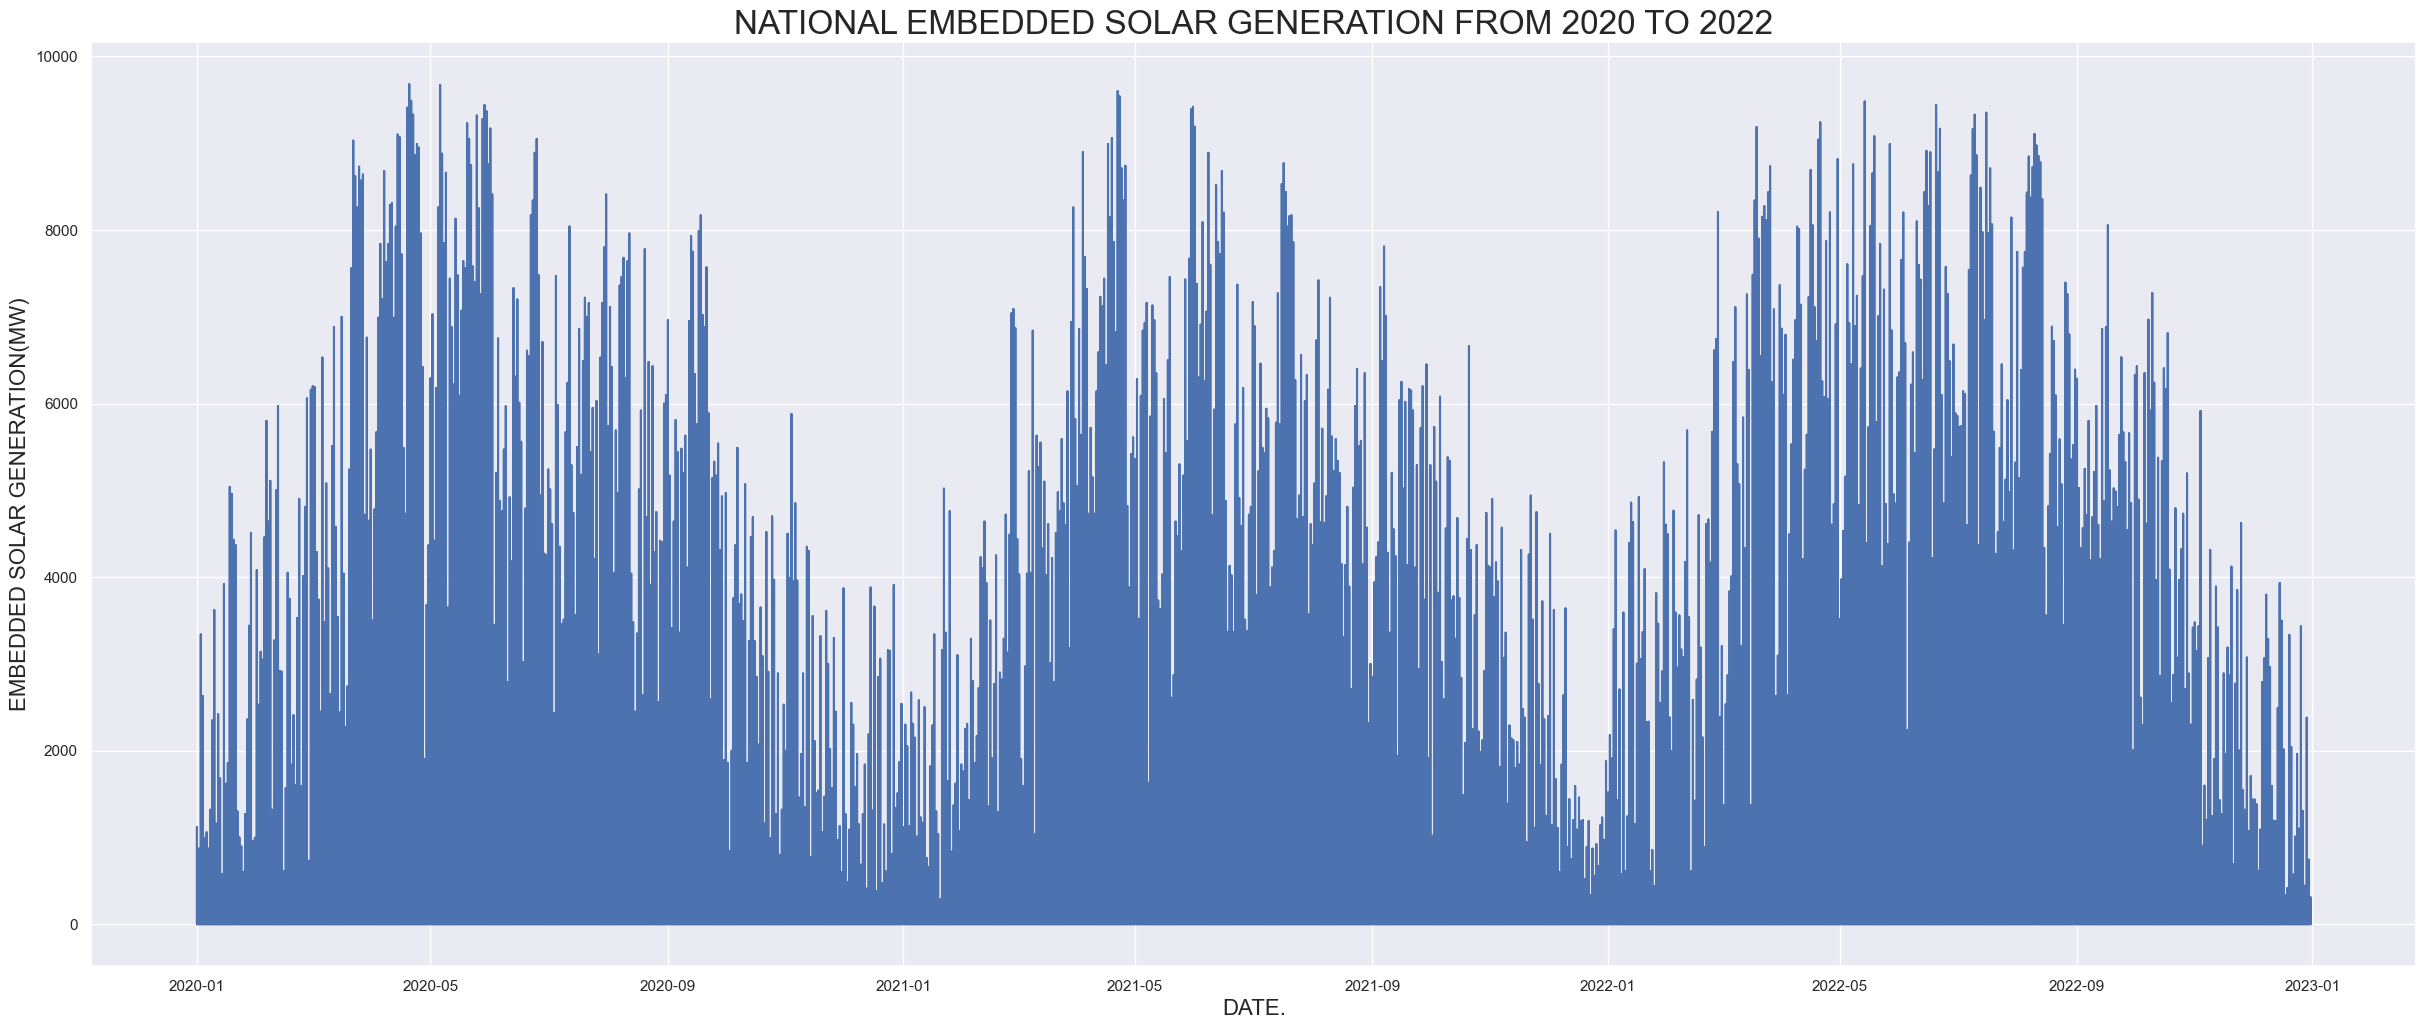

In [33]:
#Plotting national embedded solar generation from 2020 to 2022
ax = timeseries(df=demanddata_df, column='EMBEDDED_SOLAR_GENERATION', 
                  ylabel='EMBEDDED SOLAR GENERATION(MW)',
                 title='NATIONAL EMBEDDED SOLAR GENERATION FROM 2020 TO 2022')

plt.show()

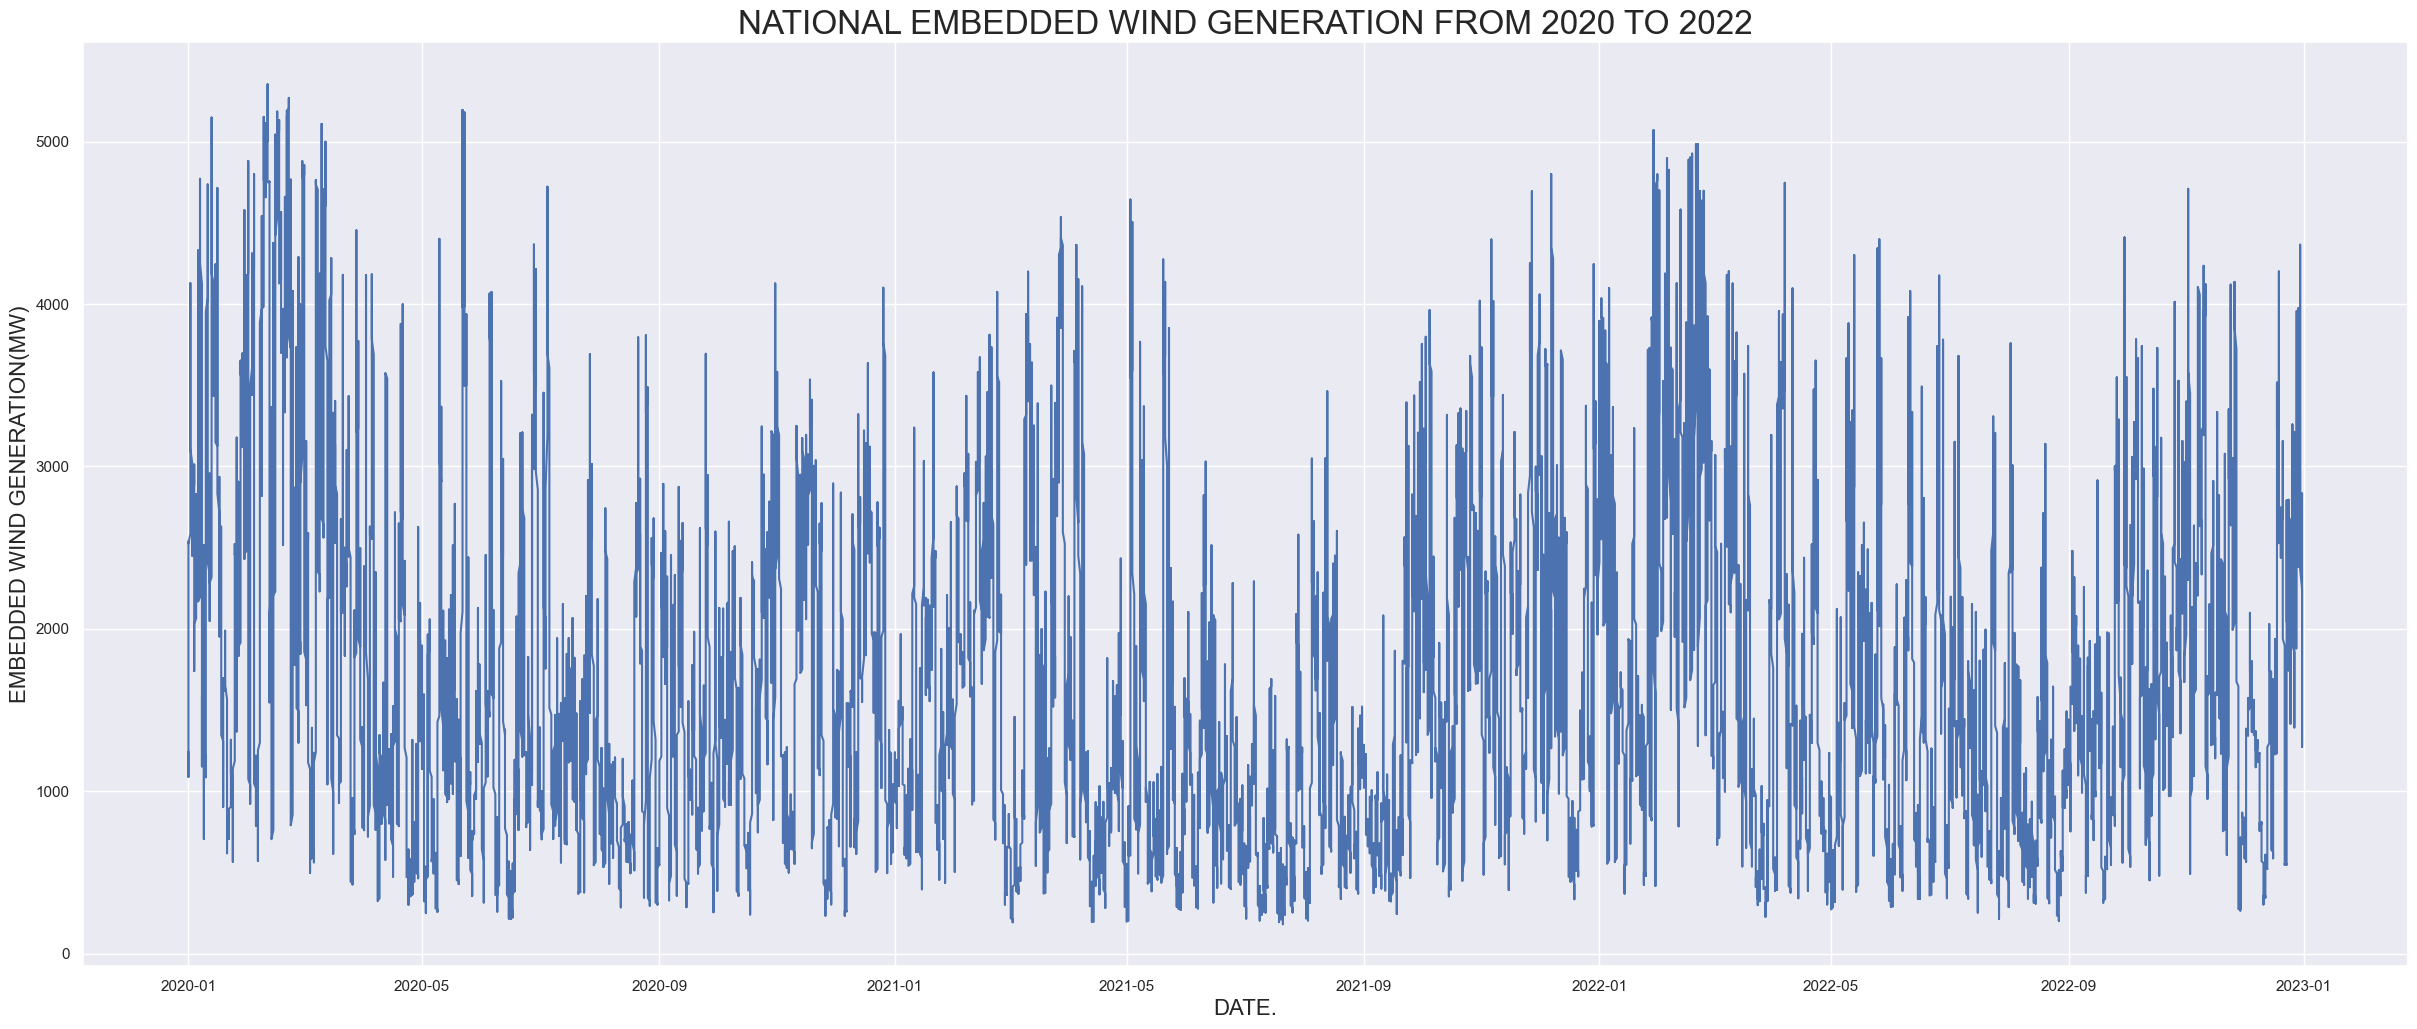

In [34]:
#Plotting national embedded wind generation from 2020 to 2022
ax = timeseries(df=demanddata_df, column='EMBEDDED_WIND_GENERATION', 
                  ylabel='EMBEDDED WIND GENERATION(MW)',
                 title='NATIONAL EMBEDDED WIND GENERATION FROM 2020 TO 2022')
plt.show()

Text(0.5, 0, 'Electricity Demand')

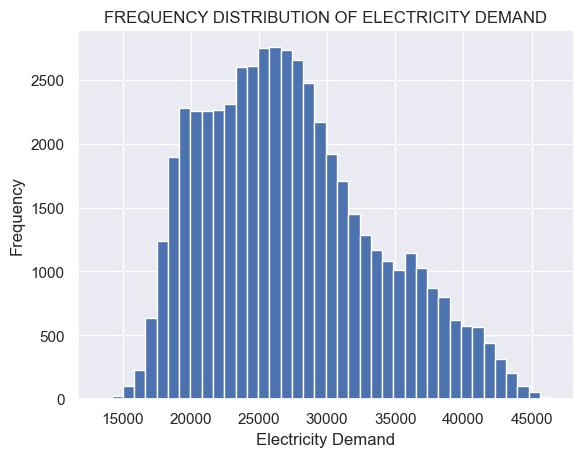

In [35]:
#Plotting frequency distribution of the electricity demand
ax = demanddata_df['NATIONAL_DEMAND'].plot.hist(bins=40, alpha=1)
plt.title('FREQUENCY DISTRIBUTION OF ELECTRICITY DEMAND')
plt.xlabel('Electricity Demand')
#plt.ylabel('Electricity Demand')

The national electricity demand roughly follows a normal distribution. I will check whether the time series of national demand is stationary, after visualizing its decomposed component time-series.

**WEATHER VARIABLES ANALYSIS**

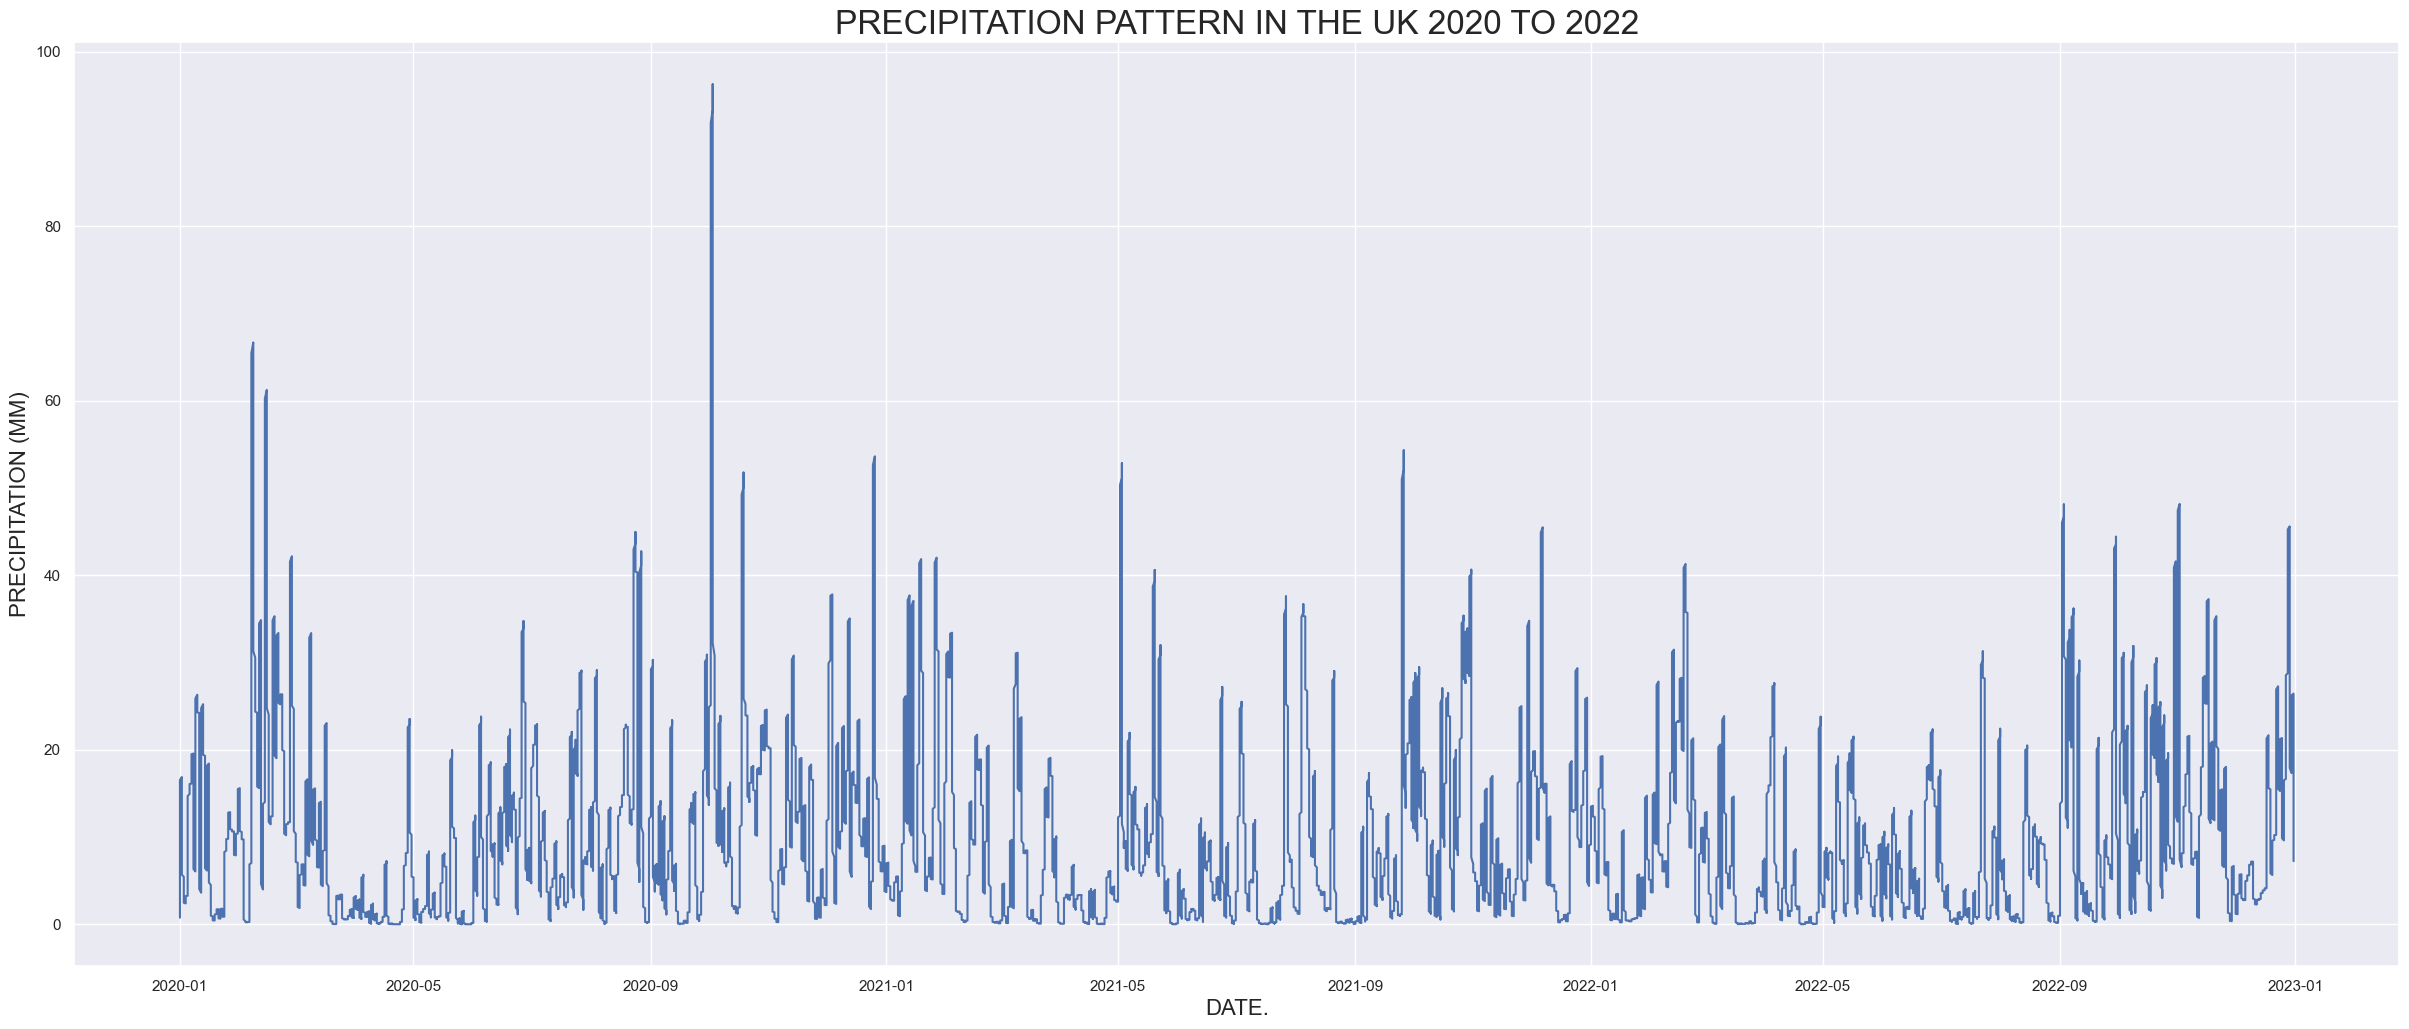

In [36]:
#Plotting precipitation pattern from 2020 to 2022
ax = timeseries(demanddata_df, 'PRECIPITATION',  ylabel='PRECIPITATION (MM)',
                 title='PRECIPITATION PATTERN IN THE UK 2020 TO 2022')
plt.show()

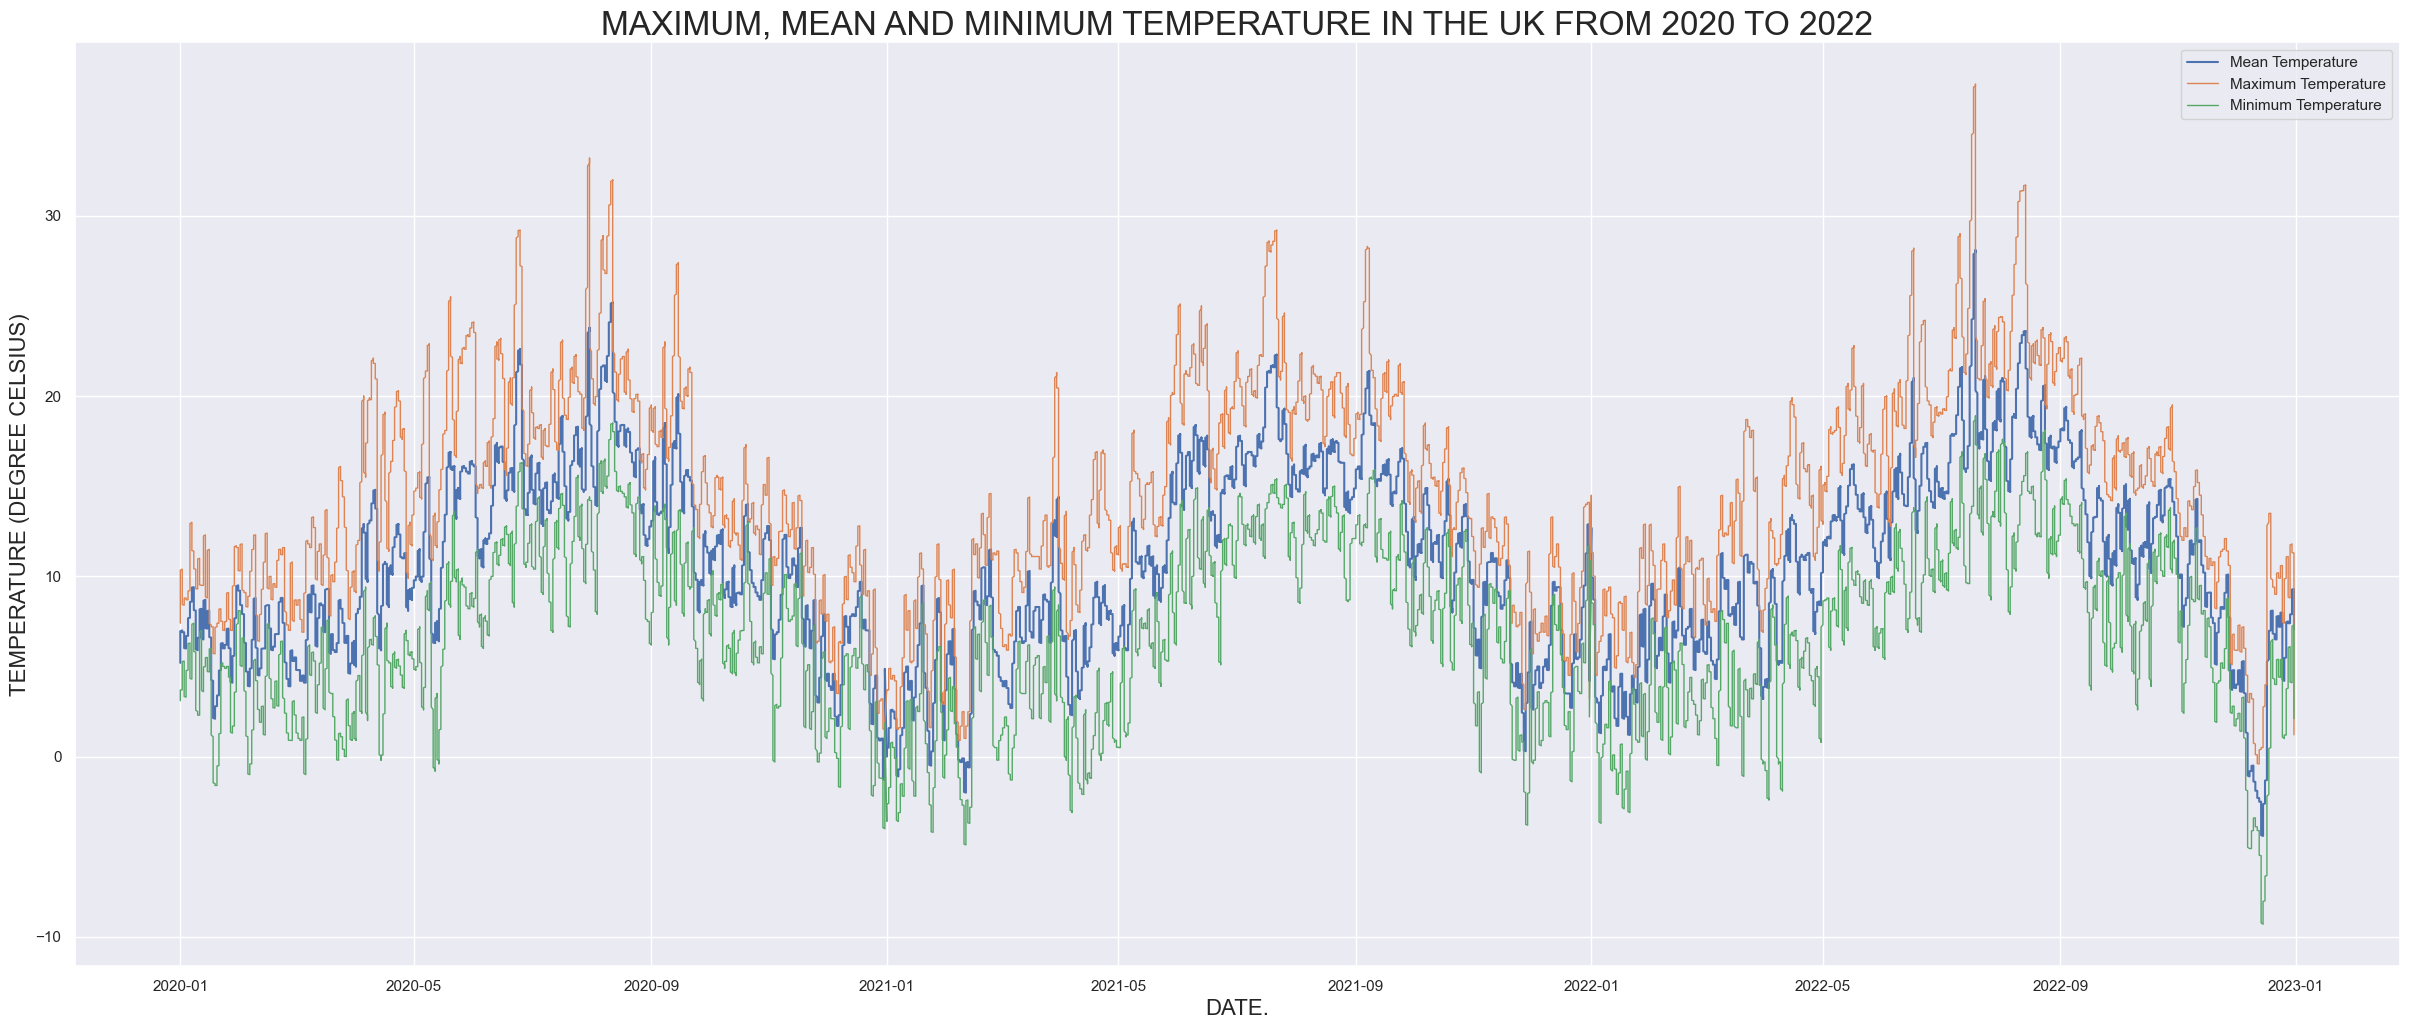

In [37]:
#Plotting minimum, mean and maximum temperature from 2020 to 2022
MAX_TEMP = demanddata_df['MAX_TEMP']
MIN_TEMP = demanddata_df['MIN_TEMP']
ax = timeseries(df=demanddata_df, column='MEAN_TEMP',
                  ylabel='TEMPERATURE (DEGREE CELSIUS)',
                 title='MAXIMUM, MEAN AND MINIMUM TEMPERATURE IN THE UK FROM 2020 TO 2022')
ax.plot( MAX_TEMP , linestyle='-', linewidth=1, )
ax.plot( MIN_TEMP , linestyle='-', linewidth=1, )
ax.legend(['Mean Temperature', 'Maximum Temperature', 'Minimum Temperature'])
plt.show()

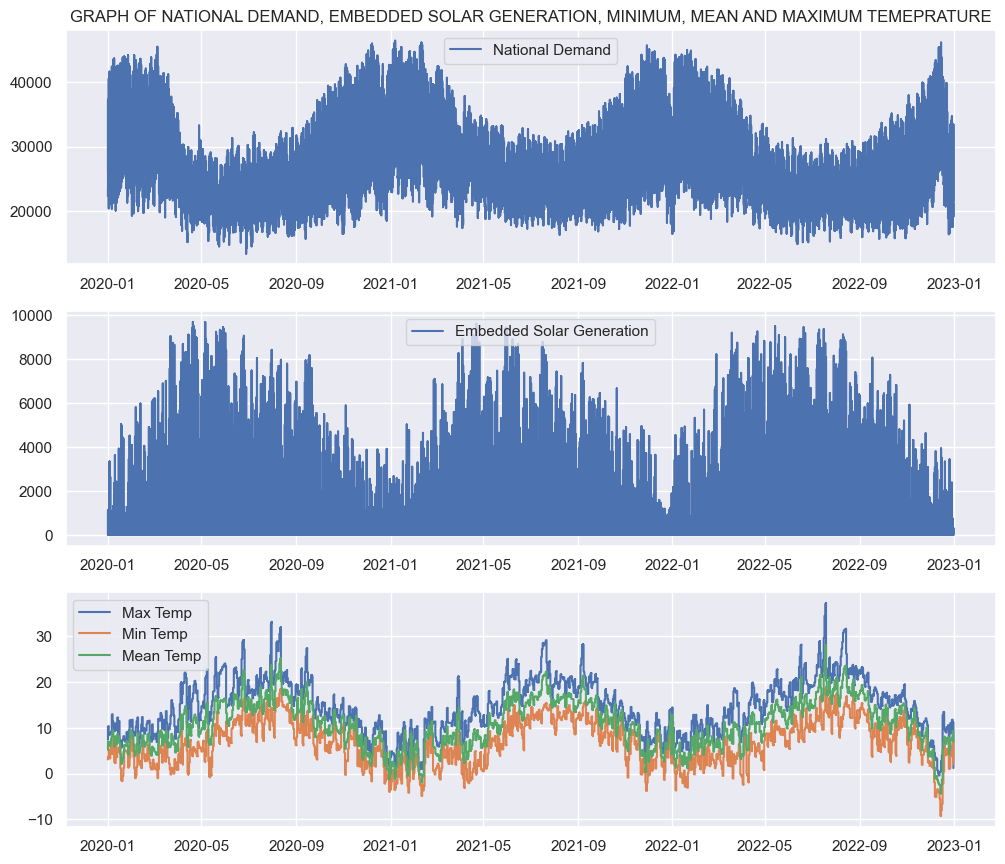

In [38]:
plt.figure(figsize=(12, 14))
plt.subplot(411)
plt.plot(demanddata_df['NATIONAL_DEMAND'], label='National Demand')
plt.title('GRAPH OF NATIONAL DEMAND, EMBEDDED SOLAR GENERATION, MINIMUM, MEAN AND MAXIMUM TEMEPRATURE')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(demanddata_df['MAX_TEMP'], label='Max Temp')
plt.plot(demanddata_df['MIN_TEMP'], label='Min Temp')
plt.plot(demanddata_df['MEAN_TEMP'], label='Mean Temp')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(demanddata_df['EMBEDDED_SOLAR_GENERATION'], label='Embedded Solar Generation')
plt.legend(loc='best')
plt.show()

**DAY ELECTRICITY ANALYSIS**

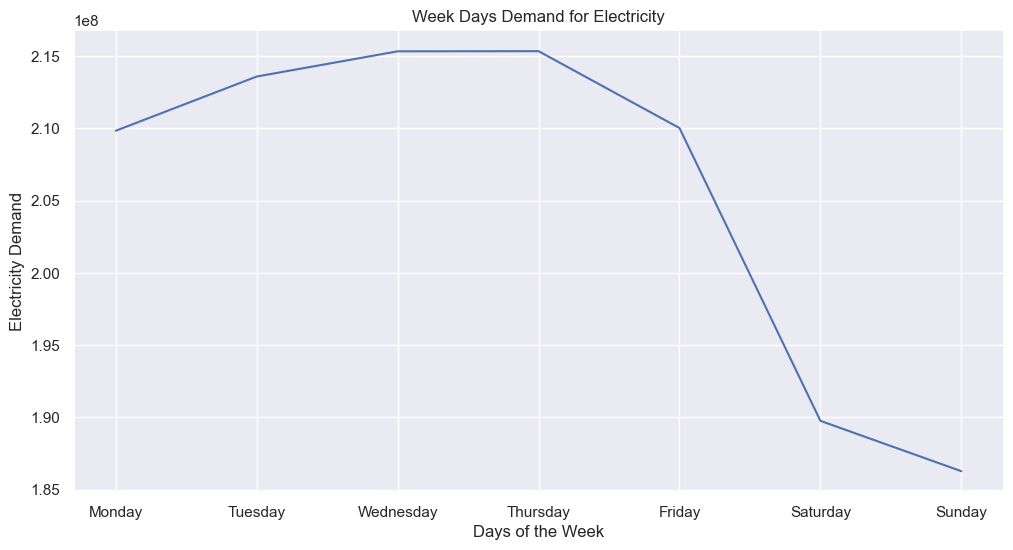

In [38]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_demand = demanddata_df.groupby('DAY_NAME')['NATIONAL_DEMAND'].sum().reset_index()
daily_demand['DAY_NAME'] = pd.Categorical(daily_demand['DAY_NAME'], categories=day_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x='DAY_NAME', y= 'NATIONAL_DEMAND', data = daily_demand)
plt.title('Week Days Demand for Electricity')
plt.xlabel('Days of the Week')
plt.ylabel('Electricity Demand')
plt.show()

**HOURLY DEMAND ANALYSIS**

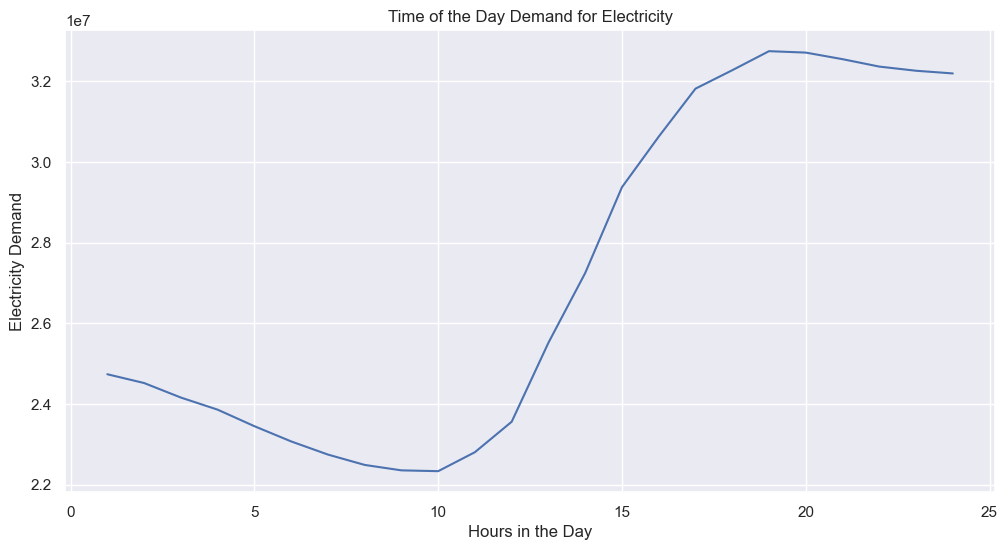

In [39]:
hourly_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
hourly_demand = demanddata_df.groupby('HALFHOUR_PERIOD')['NATIONAL_DEMAND'].sum().sort_values(ascending=False).reset_index()
hourly_demand['HALFHOUR_PERIOD'] = pd.Categorical(hourly_demand['HALFHOUR_PERIOD'], categories=hourly_order, ordered=True)
#monthly_demand.sort_values('MONTH_NAME', inplace=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x= 'HALFHOUR_PERIOD', y= 'NATIONAL_DEMAND', data = hourly_demand )
plt.title('Time of the Day Demand for Electricity')
plt.xlabel('Hours in the Day')
plt.ylabel('Electricity Demand')
plt.show()

**MONTHLY ELECTRICITY DEMAND ANALYSIS**

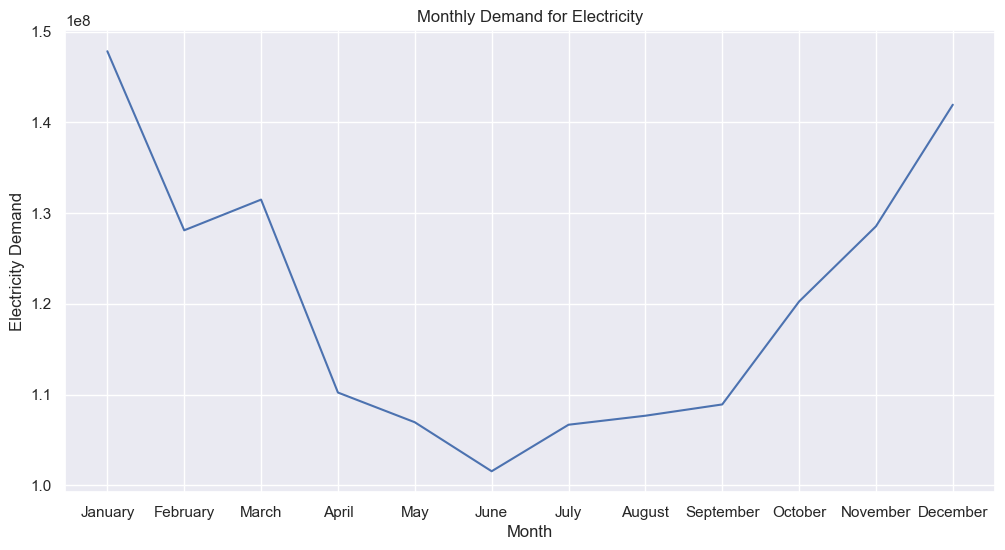

In [40]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_demand = demanddata_df.groupby('MONTH_NAME')['NATIONAL_DEMAND'].sum().sort_values(ascending=False).reset_index()
monthly_demand['MONTH_NAME'] = pd.Categorical(monthly_demand['MONTH_NAME'], categories=month_order, ordered=True)
monthly_demand.sort_values('MONTH_NAME', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH_NAME', y='NATIONAL_DEMAND', data=monthly_demand)
plt.title('Monthly Demand for Electricity')
plt.xlabel('Month')
plt.ylabel('Electricity Demand')
plt.show()

**DAYS IN MONTH ANALYSIS**

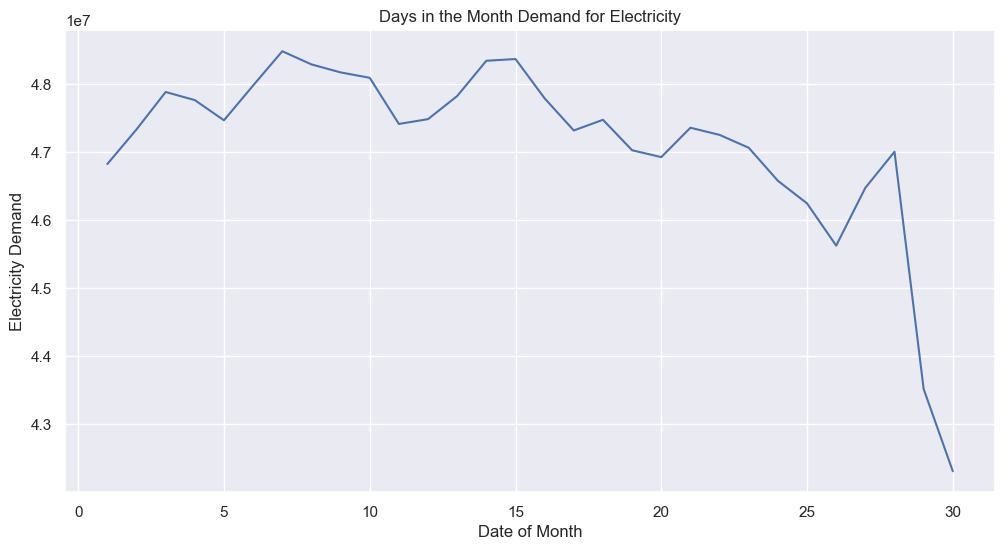

In [41]:
day_monthly_demand = demanddata_df.groupby('DAY_OF_MONTH')['NATIONAL_DEMAND'].sum().sort_values(ascending=False).reset_index()

#Excluding 31st of each month from the analysis due to the skewness in data
day_monthly_demand = day_monthly_demand.iloc[:-1]

plt.figure(figsize=(12, 6))
sns.lineplot(x=day_monthly_demand['DAY_OF_MONTH'], y=day_monthly_demand['NATIONAL_DEMAND'])
plt.title('Days in the Month Demand for Electricity')
plt.xlabel('Date of Month')
plt.ylabel('Electricity Demand')
plt.show()


In [43]:
#Dropping the columns that won't be needed further in our analysis
demanddata_df=demanddata_df.drop(['HALFHOUR_PERIOD', 'DAY_OF_MONTH','DAY_NAME', 'MONTH_NAME'], axis=1)

**Seasonal Decomposition of the Output Variable**

**Step 1**

In [44]:
#daily decomposition
daily_decomposition = seasonal_decompose(demanddata_df['NATIONAL_DEMAND'], period=48, model='additive', extrapolate_trend='freq')
daily_observed = daily_decomposition.observed
daily_seasonal = daily_decomposition.seasonal
daily_trend = daily_decomposition.trend
daily_residual = daily_decomposition.resid

#calculate the daily decomposition
y_daily_decomposition = daily_observed - daily_seasonal

#feed the daily decomposition into the weekly decomposition
weekly_decomposition = seasonal_decompose(y_daily_decomposition, period=48*7, model='additive', extrapolate_trend='freq')
weekly_observed = weekly_decomposition.observed
weekly_seasonal = weekly_decomposition.seasonal
weekly_trend = weekly_decomposition.trend
weekly_residual = weekly_decomposition.resid

#calculate the weekly decomposition
y_weekly_decomposition = weekly_observed - weekly_seasonal

#feed the weekly decomposition into the monthly decomposition
monthly_decomposition = seasonal_decompose(y_weekly_decomposition, period=48*7*4, model='additive', extrapolate_trend='freq')
monthly_observed = monthly_decomposition.observed
monthly_seasonal = monthly_decomposition.seasonal
monthly_trend = monthly_decomposition.trend
monthly_residual = monthly_decomposition.resid

#calculate the monthly decomposition
y_monthly_decomposition = monthly_observed - monthly_seasonal

#feed the monthly decomposition into the yearly decomposition
yearly_decomposition = seasonal_decompose(y_monthly_decomposition, period=48*365, model='additive', extrapolate_trend='freq')
yearly_observed = yearly_decomposition.observed
yearly_seasonal = yearly_decomposition.seasonal
yearly_trend = yearly_decomposition.trend
yearly_residual = yearly_decomposition.resid

#calculate the yearly decomposition
y_yearly_decomposition = yearly_observed - yearly_seasonal


**Step 2: Refinement of extracted seasonal component**

In [45]:
y2_daily_decomposition = y_yearly_decomposition + daily_seasonal

#refined daily decomposition
daily1_decomposition = seasonal_decompose(y2_daily_decomposition, period=48, model='additive', extrapolate_trend='freq')
daily1_observed = daily1_decomposition.observed
daily1_seasonal = daily1_decomposition.seasonal
daily1_trend = daily1_decomposition.trend
daily1_residual = daily1_decomposition.resid

#calculate the daily refined decomposition
daily_decomposition = daily1_observed - daily1_seasonal

#add the seasonality back
y2_weekly_decomposition = daily_decomposition + weekly_seasonal

#refined weekly decomposition
weekly1_decomposition = seasonal_decompose(y2_weekly_decomposition, period=48*7, model='additive', extrapolate_trend='freq')
weekly1_observed = weekly1_decomposition.observed
weekly1_seasonal = weekly1_decomposition.seasonal
weekly1_trend = weekly1_decomposition.trend
weekly1_residual = weekly1_decomposition.resid

#calculate the weekly refined decomposition
weekly_decomposition = weekly1_observed - weekly1_seasonal

#add the seasonality back
y2_monthly_decomposition = weekly_decomposition + monthly_seasonal

#refined monthly decomposition
monthly1_decomposition = seasonal_decompose(y2_monthly_decomposition, period=48*7*4, model='additive', extrapolate_trend='freq')
monthly1_observed = monthly1_decomposition.observed
monthly1_seasonal = monthly1_decomposition.seasonal
monthly1_trend = monthly1_decomposition.trend
monthly1_residual = monthly1_decomposition.resid

#calculate the monthly refined decomposition
monthly_decomposition = monthly1_observed - monthly1_seasonal

#add the seasonality back
y2_yearly_decomposition = monthly_decomposition + yearly_seasonal

#refined yearly decomposition
yearly1_decomposition = seasonal_decompose(y2_yearly_decomposition, period=48*365, model='additive', extrapolate_trend='freq')
yearly1_observed = yearly1_decomposition.observed
yearly1_seasonal = yearly1_decomposition.seasonal
yearly1_trend = yearly1_decomposition.trend
yearly1_residual = yearly1_decomposition.resid

#calculate the yearly refined decomposition
yearly_decomposition = yearly1_observed - yearly1_seasonal

**Extracting the trend**

In [46]:
Final_trend = pd.DataFrame(yearly1_trend)
Final_trend.head()

trend
DATE.                   
2020-01-01  26372.905560
2020-01-01  26372.993434
2020-01-01  26373.081308
2020-01-01  26373.169183
2020-01-01  26373.257057

**Extracting the residual**

In [47]:
Final_residual = yearly_decomposition - yearly1_trend
Final_residual.head()

DATE.
2020-01-01    2684.507388
2020-01-01    2764.310855
2020-01-01    2799.603083
2020-01-01    2644.685369
2020-01-01    2589.067479
dtype: float64

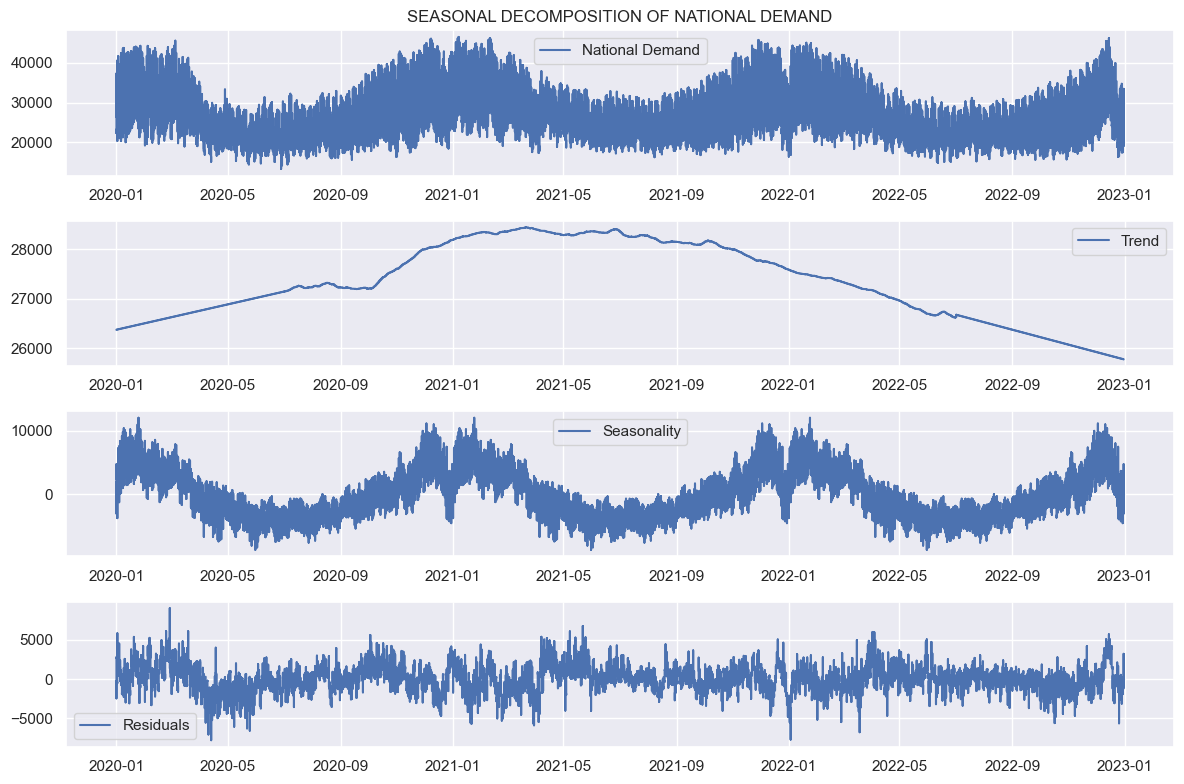

In [48]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(demanddata_df['NATIONAL_DEMAND'], label='National Demand')
plt.title('SEASONAL DECOMPOSITION OF NATIONAL DEMAND')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(yearly1_trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(yearly1_seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(Final_residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Daily Trend, Seasonal and Residual Components**

Text(0.5, 0, 'Date')

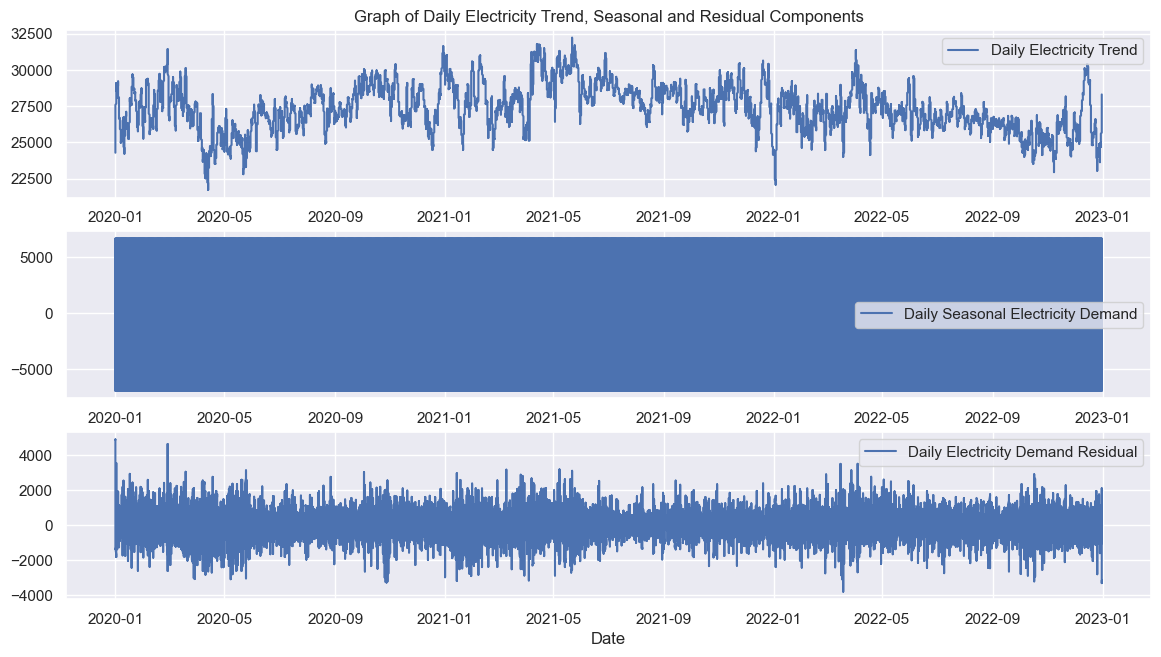

In [49]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(daily1_trend, label='Daily Electricity Trend')
plt.title('Graph of Daily Electricity Trend, Seasonal and Residual Components')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(daily1_seasonal, label='Daily Seasonal Electricity Demand' )
plt.legend(loc='best')
plt.subplot(413)
plt.plot(daily1_residual, label='Daily Electricity Demand Residual' )
plt.legend(loc='best')
plt.xlabel('Date')

**Weekly Trend, Seasonal and Residual Components**

Text(0.5, 0, 'Date')

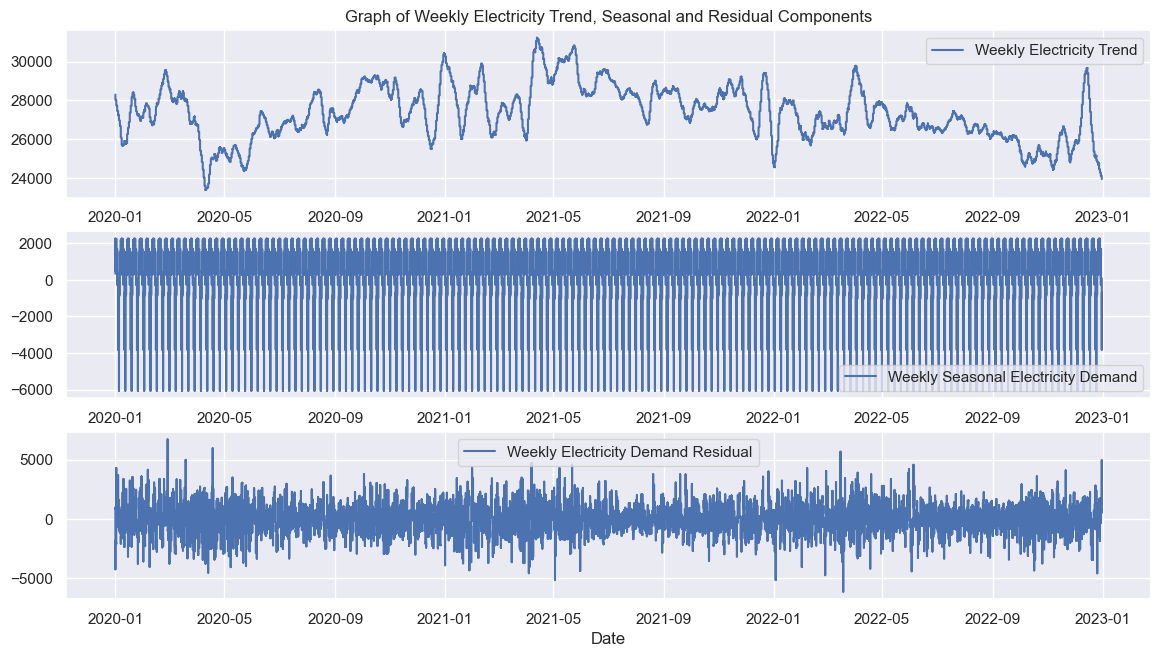

In [50]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(weekly1_trend, label='Weekly Electricity Trend')
plt.title('Graph of Weekly Electricity Trend, Seasonal and Residual Components')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(weekly1_seasonal, label='Weekly Seasonal Electricity Demand' )
plt.legend(loc='best')
plt.subplot(413)
plt.plot(weekly1_residual, label='Weekly Electricity Demand Residual' )
plt.legend(loc='best')
plt.xlabel('Date')

**Monthly Trend, Seasonal and Residual Components**

Text(0.5, 0, 'Date')

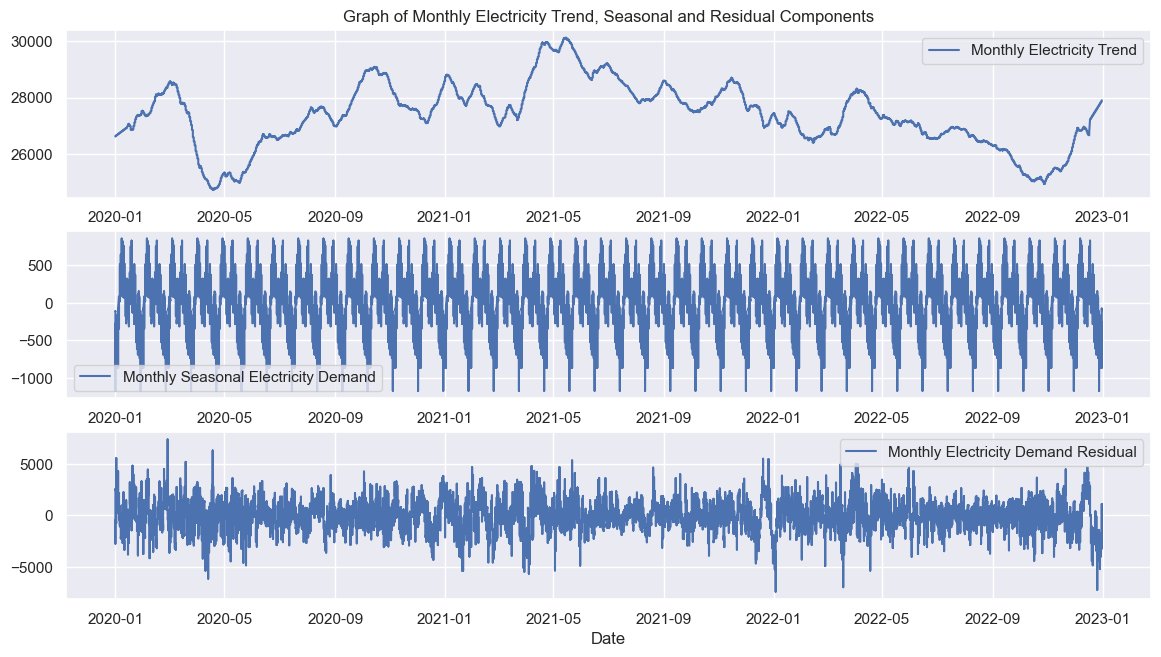

In [51]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(monthly1_trend, label='Monthly Electricity Trend')
plt.title('Graph of Monthly Electricity Trend, Seasonal and Residual Components')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(monthly1_seasonal, label='Monthly Seasonal Electricity Demand' )
plt.legend(loc='best')
plt.subplot(413)
plt.plot(monthly1_residual, label='Monthly Electricity Demand Residual' )
plt.legend(loc='best')
plt.xlabel('Date')

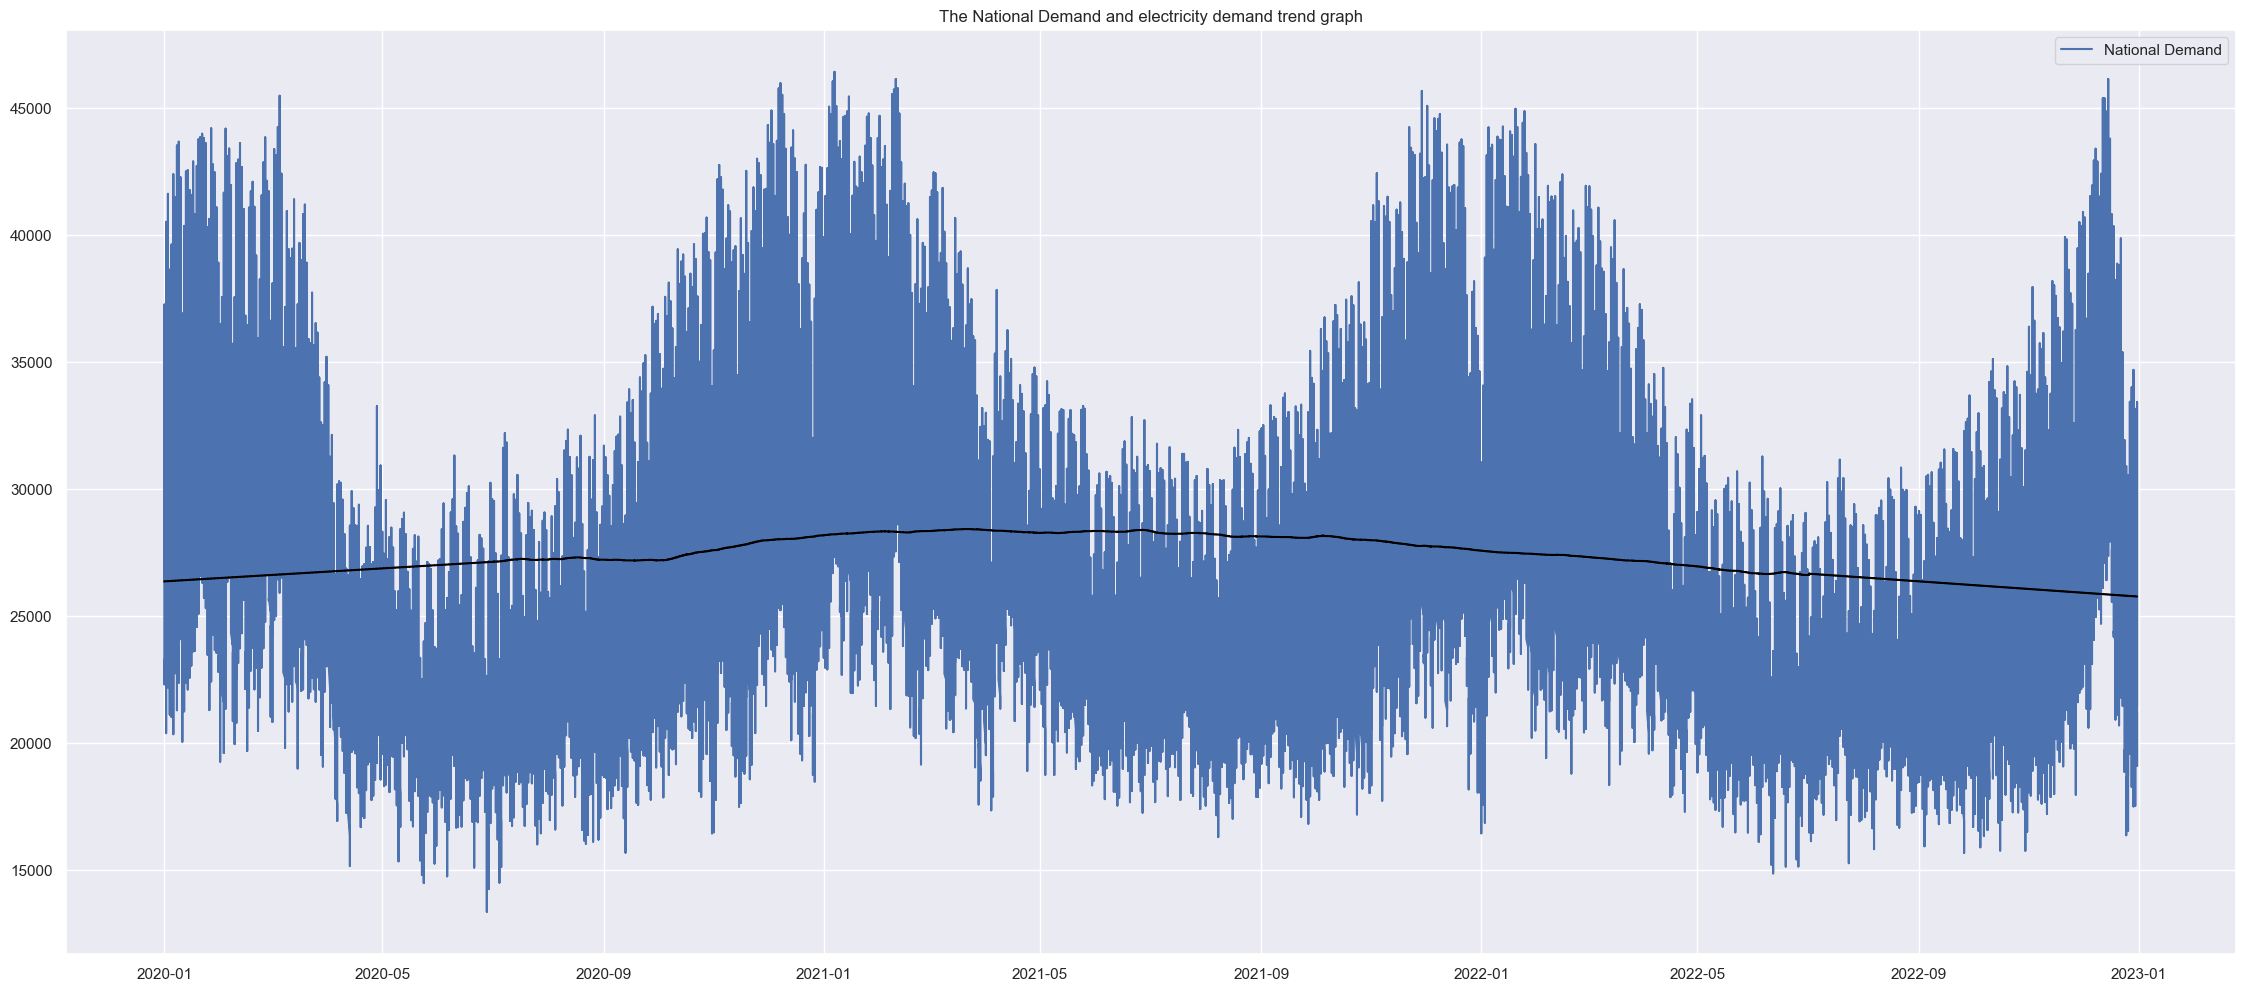

In [52]:
plt.figure(figsize=(28,12))
plt.plot(demanddata_df['NATIONAL_DEMAND'], label='National Demand')
plt.title('The National Demand and electricity demand trend graph')
plt.legend(loc='best')
plt.plot(yearly1_trend, label='Trend',color='black')

**FEATURE ENGINEERING**

In [53]:
#Checking if there are missing values
pd.date_range(start = '2020-01-01', end = '2023-01-01', freq = '30T').difference(demanddata_df.index)

DatetimeIndex(['2020-01-01 00:30:00', '2020-01-01 01:00:00',
               '2020-01-01 01:30:00', '2020-01-01 02:00:00',
               '2020-01-01 02:30:00', '2020-01-01 03:00:00',
               '2020-01-01 03:30:00', '2020-01-01 04:00:00',
               '2020-01-01 04:30:00', '2020-01-01 05:00:00',
               ...
               '2022-12-31 19:30:00', '2022-12-31 20:00:00',
               '2022-12-31 20:30:00', '2022-12-31 21:00:00',
               '2022-12-31 21:30:00', '2022-12-31 22:00:00',
               '2022-12-31 22:30:00', '2022-12-31 23:00:00',
               '2022-12-31 23:30:00', '2023-01-01 00:00:00'],
              dtype='datetime64[ns]', length=51513, freq=None)

In [54]:
len(demanddata_df)

52608

In [55]:
len(demanddata_df.index)

52608

**CORELLATION ANALYSIS**

<AxesSubplot:>

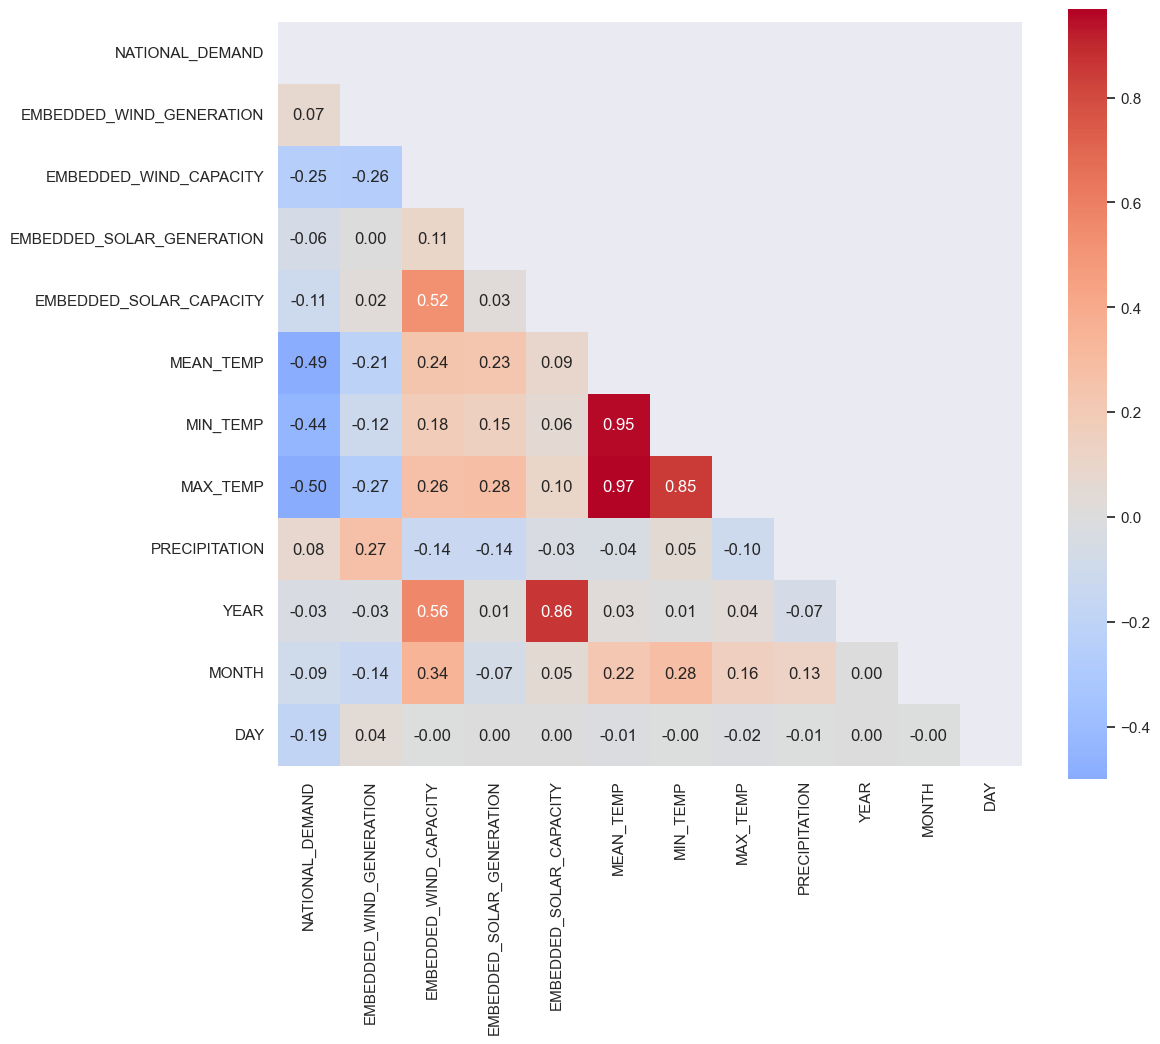

In [57]:
demanddata_df_corr = demanddata_df.corr(method='pearson')
mask = np.triu(np.ones_like(demanddata_df_corr, dtype = bool))
plt.figure(figsize =(12, 10))
sns.heatmap(demanddata_df_corr, mask=mask, cmap = 'coolwarm', center = 0, annot = True, fmt ='.2f', square = True)

<AxesSubplot:>

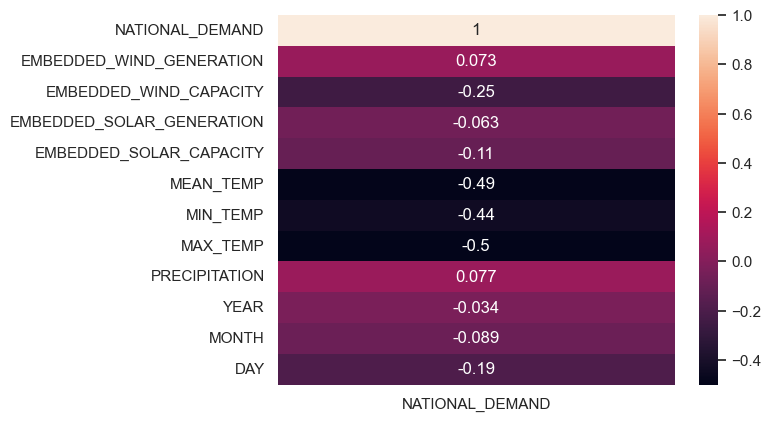

In [58]:
sns.heatmap(demanddata_df.corr()[['NATIONAL_DEMAND']], annot = True)

**No feature has  significant correlation above 90%. There's no need to exclude any feature.**

**SPLITTING DATASET INTO TRAIN AND VALIDATION DATA**

In [59]:
Newdemanddata_df = demanddata_df.drop(columns = 'DATE')
Newdemanddata_df.head(1)

NATIONAL_DEMAND  EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
DATE.                                                                           
2020-01-01            26340                      1244                    6465   

            EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  MEAN_TEMP  \
DATE.                                                                       
2020-01-01                          0                    13080        5.2   

            MIN_TEMP  MAX_TEMP  PRECIPITATION  YEAR  MONTH  DAY  
DATE.                                                            
2020-01-01       3.1       7.4           0.75  2020      1    2

In [62]:
Testdemanddata_df = Newdemanddata_df.tail(336)

Traindemanddata_df = Newdemanddata_df.iloc[:,0:12]
Traindemanddata_df = Traindemanddata_df[:-336]

In [63]:
print('Testdemanddata_df',Testdemanddata_df.shape )
print('Traindemanddata_df',Traindemanddata_df.shape )

Testdemanddata_df (336, 12)
Traindemanddata_df (52272, 12)


In [64]:
Traindemanddata_df.head()

NATIONAL_DEMAND  EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
DATE.                                                                           
2020-01-01            26340                      1244                    6465   
2020-01-01            26921                      1188                    6465   
2020-01-01            26569                      1156                    6465   
2020-01-01            25754                      1125                    6465   
2020-01-01            25075                      1106                    6465   

            EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  MEAN_TEMP  \
DATE.                                                                       
2020-01-01                          0                    13080       5.20   
2020-01-01                          0                    13080       5.24   
2020-01-01                          0                    13080       5.28   
2020-01-01                          0                    13080       5.31   
2020-01-01                          0                    13080       5.35   

            MIN_TEMP  MAX_TEMP  PRECIPITATION  YEAR  MONTH  DAY  
DATE.                                                            
2020-01-01      3.10      7.40           0.75  2020      1    2  
2020-01-01      3.11      7.46           1.09  2020      1    2  
2020-01-01      3.12      7.52           1.43  2020      1    2  
2020-01-01      3.14      7.59           1.76  2020      1    2  
2020-01-01      3.15      7.65           2.10  2020      1    2

**STANDARD SCALING**

In [65]:
demand_values = Traindemanddata_df['NATIONAL_DEMAND'].values.reshape(-1, 1)

#Feature Scaling
scaler = StandardScaler()
scaled_demand = scaler.fit_transform(demand_values)

**TRAIN-TEST SPLITTING**

In [66]:
train_size = int(len(scaled_demand) * 0.8)
train_data = scaled_demand[:train_size]
test_data = scaled_demand[train_size:]

In [67]:
#Sequence Generation
def generate_sequences(Traindemanddata_df, seq_length):
    X, y = [], []
    for i in range(len(Traindemanddata_df) - seq_length):
        X.append(Traindemanddata_df[i:i+seq_length])
        y.append(Traindemanddata_df[i+seq_length])
    return np.array(X), np.array(y)


sequence_length = 7
X_train, y_train = generate_sequences(train_data, sequence_length)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test, y_test = generate_sequences(test_data, sequence_length)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [69]:
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(41810, 7, 1) (41810, 1) (10448, 7, 1) (10448, 1)


**LSTM MODEL**

In [70]:
sequence_length = 7

In [71]:
X_train.shape[1]

7

In [72]:
# Initialize the model
model = Sequential()

# Adding the first layer of LSTM
model.add(LSTM(units=64, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.1))

# Adding the second layer
model.add(LSTM(units=64, return_sequences=True,activation='relu'))
model.add(Dropout(0.1))

# Adding the third layer
model.add(LSTM(units=64, return_sequences=True, activation='relu'))
model.add(Dropout(0.1))

# Adding the fourth layer
model.add(LSTM(units=64))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(units=1))

# Early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss='mean_squared_error', optimizer='adam')


import time

#Recording the start time before training
start_time_lstm = time.time()
#Training the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_split=0.1, verbose=1, callbacks=[early_stopping])

end_time_lstm = time.time()

Epoch 1/50
1176/1176 [==============================] - 60s 39ms/step - loss: 0.0852 - val_loss: 0.0062
Epoch 2/50
1176/1176 [==============================] - 35s 30ms/step - loss: 0.0148 - val_loss: 0.0068
Epoch 3/50
1176/1176 [==============================] - 44s 37ms/step - loss: 0.0114 - val_loss: 0.0043
Epoch 4/50
1176/1176 [==============================] - 44s 38ms/step - loss: 0.0099 - val_loss: 0.0044
Epoch 5/50
1176/1176 [==============================] - 43s 37ms/step - loss: 0.0097 - val_loss: 0.0047
Epoch 6/50
1176/1176 [==============================] - 39s 33ms/step - loss: 0.0089 - val_loss: 0.0032
Epoch 7/50
1176/1176 [==============================] - 43s 37ms/step - loss: 0.0087 - val_loss: 0.0040
Epoch 8/50
1176/1176 [==============================] - 37s 32ms/step - loss: 0.0085 - val_loss: 0.0040
Epoch 9/50
1176/1176 [==============================] - 16s 14ms/step - loss: 0.0082 - val_loss: 0.0045
Epoch 10/50
1176/1176 [==============================] - 17s 14m

In [73]:
total_training_time_lstm = end_time_lstm - start_time_lstm
print(f"Total Training Time_lstm: {total_training_time_lstm:.2f} seconds")

Total Training Time_lstm: 399.09 seconds


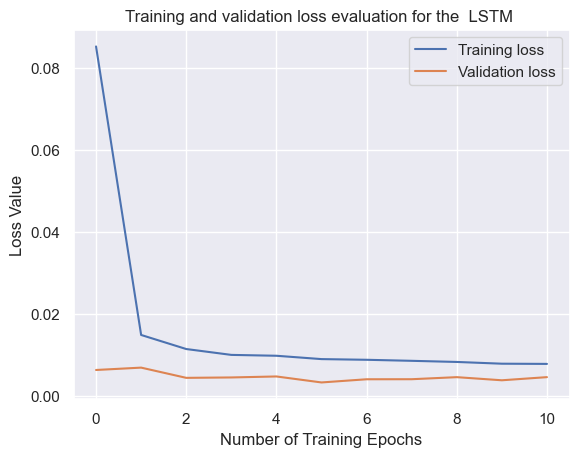

In [74]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Number of Training Epochs')
plt.ylabel('Loss Value')
plt.title('Training and validation loss evaluation for the  LSTM ')
plt.legend();

In [75]:
#Prediction
y_pred = model.predict(X_test)

327/327 [==============================] - 5s 10ms/step


In [76]:
#model evaluation-loss value
loss = model.evaluate(X_test, y_test)
loss

327/327 [==============================] - 3s 8ms/step - loss: 0.0037


0.0036924362648278475

In [77]:
Predicted_Demand = scaler.inverse_transform(y_pred) #.reshape(1, -1)).astype('float64')
Tested_Demand = scaler.inverse_transform(y_test)

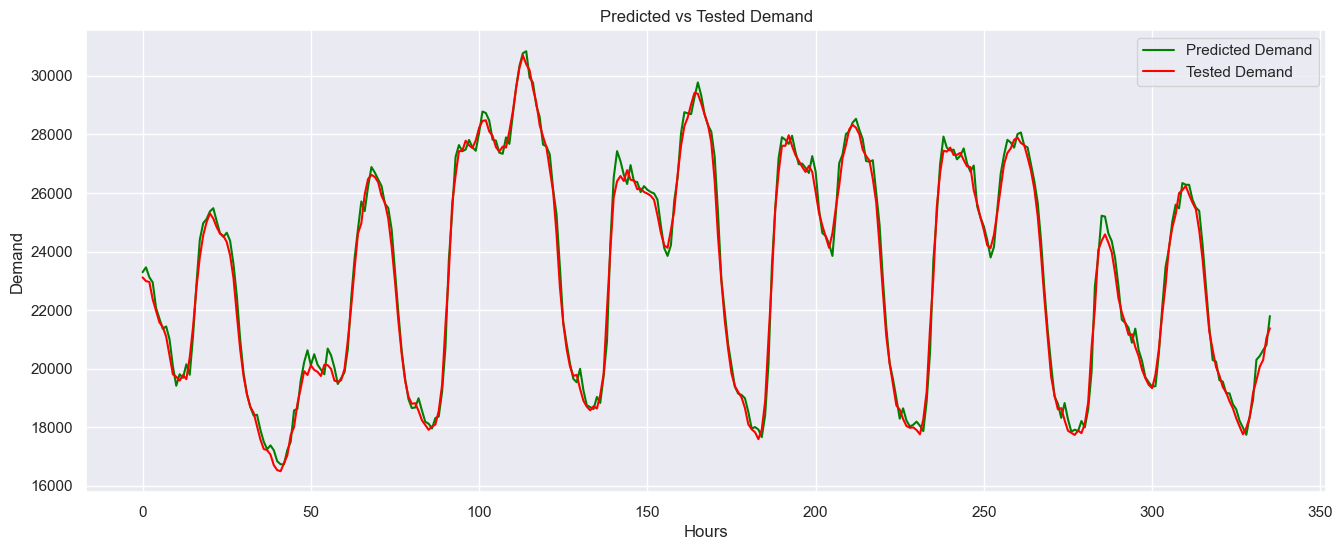

In [79]:
#Plotting the first 336 values of Predicted_Demand and Tested_Demand
plt.figure(figsize = (16, 6))
plt.plot(Predicted_Demand[:336], label='Predicted Demand', color='green')
plt.plot(Tested_Demand[:336], label='Tested Demand', color='red')
plt.xlabel('Hours')
plt.ylabel('Demand')
plt.title('Predicted vs Tested Demand')
plt.legend()
plt.show()

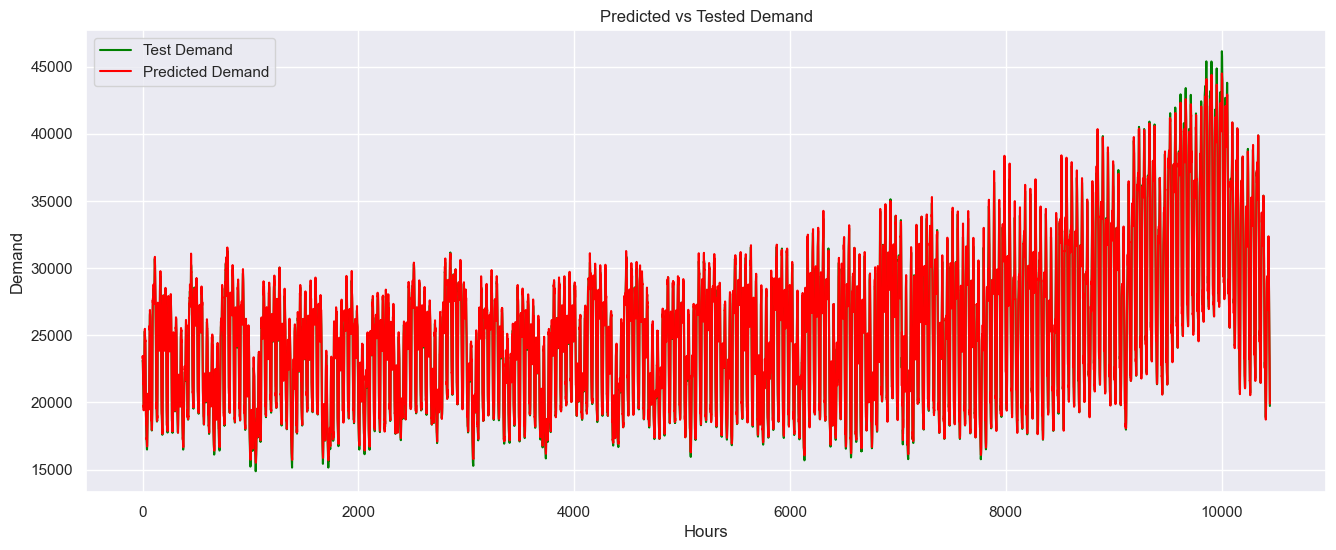

In [80]:
plt.figure(figsize = (16, 6))
plt.plot(Tested_Demand, color='green', label='Test Demand')
plt.plot(Predicted_Demand, color='red', label='Predicted Demand')
plt.xlabel('Hours')
plt.ylabel('Demand')
plt.title('Predicted vs Tested Demand')
plt.legend()

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate mean squared error (MSE)
LSTM_MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):%.4f' % LSTM_MSE)

print('='*50)
print('\n')
# Calculate root mean squared error (RMSE)
LSTM_RMSE = np.sqrt(LSTM_MSE).round(5)
print('Root Mean Squared Error (RMSE):%.4f' % LSTM_RMSE)

print('='*50)
print('\n')
# Calculate root mean squared error (RMSE)
LSTM_MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):%.4f' % LSTM_MAPE)

print('='*50)
print('\n')

LSTM_r2 = r2_score(y_pred,y_test)
print('R2 Score: %.4f' % LSTM_r2)

print('='*50)
print('\n')
LSTM_MASE = np.mean([abs(y_test[i] - y_pred[i]) / (abs(y_test[i] - y_test[i - 1]) / len(y_test) - 1) for i in range(1, len(y_test))])
print('Mean Absolute Scaled Error (MASE):%.4f' % LSTM_MASE)

Mean Squared Error (MSE):0.0037


Root Mean Squared Error (RMSE):0.0608


Mean Absolute Percentage Error (MAPE):0.3551


R2 Score: 0.9951


Mean Absolute Scaled Error (MASE):-0.0467


**CNN-LSTM**

In [82]:
cnn_lstm = Sequential()
cnn_lstm.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
cnn_lstm.add(Dropout(0.2))
#cnn_lstm.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#cnn_lstm.add(Dropout(0.2))
cnn_lstm.add(Conv1D(filters=64, kernel_size=3,activation='relu'))
cnn_lstm.add(Dropout(0.2))
cnn_lstm.add(LSTM(units=64, activation='relu'))
cnn_lstm.add(Dense(1))
cnn_lstm.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
# Train the model
cnn_lstm.compile(loss='mean_squared_error', optimizer='adam')

import time

#Recording the start time before training
start_time_cnn_lstm = time.time()

history_cnn_lstm = cnn_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, 
                                validation_split=0.1, callbacks=[early_stopping])

end_time_cnn_lstm = time.time()

Epoch 1/50
1176/1176 [==============================] - 10s 6ms/step - loss: 0.0373 - val_loss: 0.0062
Epoch 2/50
1176/1176 [==============================] - 6s 5ms/step - loss: 0.0122 - val_loss: 0.0053
Epoch 3/50
1176/1176 [==============================] - 5s 4ms/step - loss: 0.0100 - val_loss: 0.0051
Epoch 4/50
1176/1176 [==============================] - 5s 5ms/step - loss: 0.0087 - val_loss: 0.0040
Epoch 5/50
1176/1176 [==============================] - 6s 5ms/step - loss: 0.0081 - val_loss: 0.0061
Epoch 6/50
1176/1176 [==============================] - 5s 4ms/step - loss: 0.0075 - val_loss: 0.0048
Epoch 7/50
1176/1176 [==============================] - 5s 4ms/step - loss: 0.0071 - val_loss: 0.0039
Epoch 8/50
1176/1176 [==============================] - 5s 4ms/step - loss: 0.0069 - val_loss: 0.0038
Epoch 9/50
1176/1176 [==============================] - 5s 4ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 10/50
1176/1176 [==============================] - 5s 4ms/step - loss: 0.00

In [83]:
total_training_time_cnn_lstm = end_time_cnn_lstm - start_time_cnn_lstm
print(f"Total Training Time_cnn_lstm: {total_training_time_cnn_lstm:.2f} seconds")

Total Training Time_cnn_lstm: 113.12 seconds


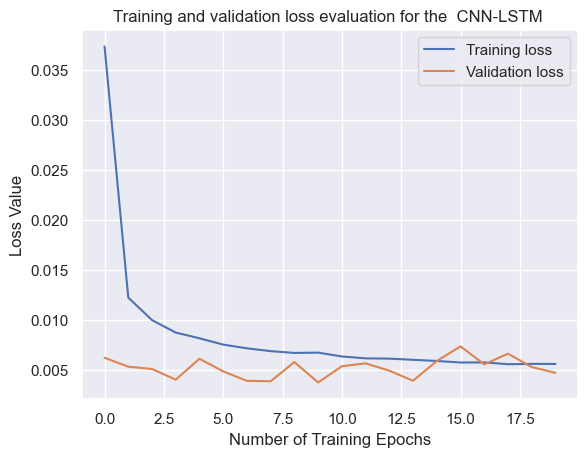

In [84]:
plt.plot(history_cnn_lstm.history['loss'],label='Training loss')
plt.plot(history_cnn_lstm.history['val_loss'],label='Validation loss')
plt.xlabel('Number of Training Epochs')
plt.ylabel('Loss Value')
plt.title('Training and validation loss evaluation for the  CNN-LSTM ')
plt.legend();

In [85]:
y_pred1 = cnn_lstm.predict(X_test)

327/327 [==============================] - 1s 1ms/step


In [86]:
loss1 = cnn_lstm.evaluate(X_test, y_test)
loss1

327/327 [==============================] - 1s 2ms/step - loss: 0.0047


0.004688445013016462

In [88]:
Predicted_Demand1 = scaler.inverse_transform(y_pred1)

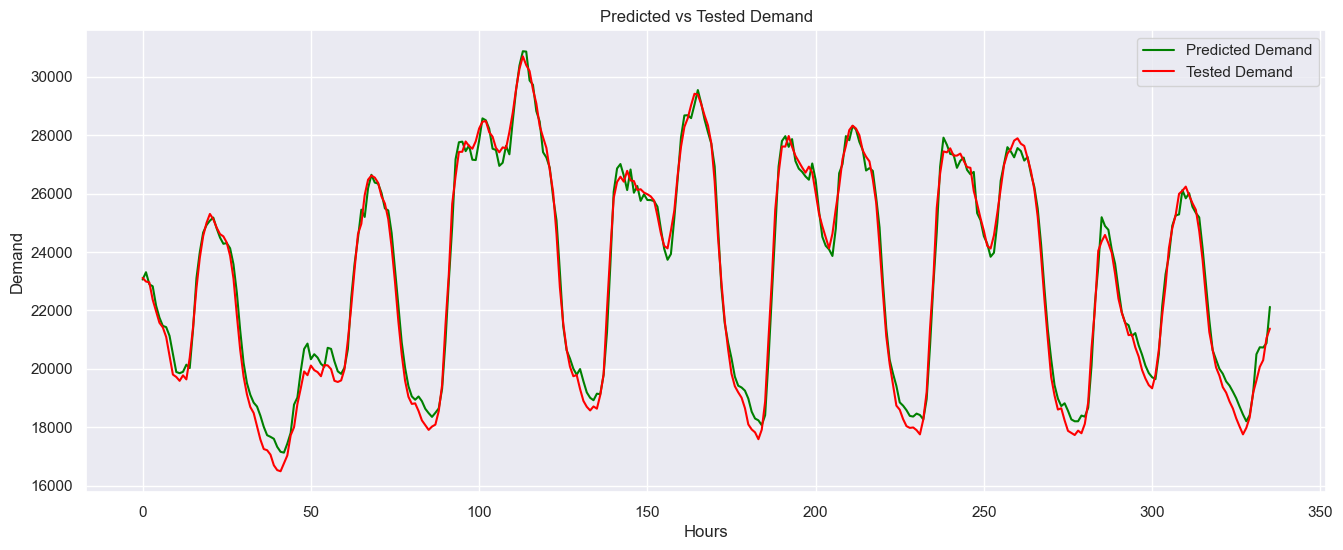

In [89]:
#Plot the first 336 values (7 days) of Predicted_Demand and Tested_Demand
plt.figure(figsize = (16, 6))
plt.plot(Predicted_Demand1[:336], label='Predicted Demand', color='green')
plt.plot(Tested_Demand[:336], label='Tested Demand', color='red')
plt.xlabel('Hours')
plt.ylabel('Demand')
plt.title('Predicted vs Tested Demand')
plt.legend()
plt.show()

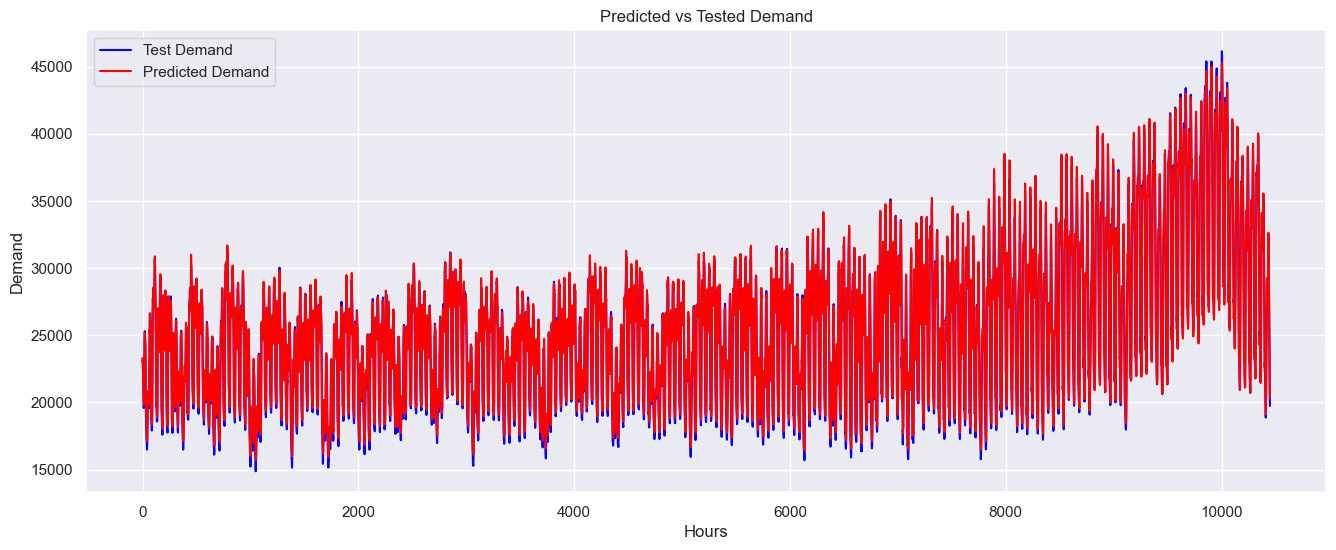

In [90]:
plt.figure(figsize = (16, 6))
plt.plot(Tested_Demand, color='blue', label='Test Demand')
plt.plot(Predicted_Demand1, color='red', label='Predicted Demand')
plt.xlabel('Hours')
plt.ylabel('Demand')
plt.title('Predicted vs Tested Demand')
plt.legend()

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate mean squared error (MSE)
CNN_LSTM_MSE = mean_squared_error(y_test, y_pred1)
print('Mean Squared Error (MSE):%.4f' % CNN_LSTM_MSE)

print('='*50)
print('\n')
# Calculate root mean squared error (RMSE)
CNN_LSTM_RMSE = np.sqrt(CNN_LSTM_MSE).round(5)
print('Root Mean Squared Error (RMSE):%.4f' % CNN_LSTM_RMSE)

print('='*50)
print('\n')
# Calculate root mean squared error (RMSE)
CNN_LSTM_MAPE = mean_absolute_percentage_error(y_test, y_pred1)
print('Mean Absolute Percentage Error (MAPE):%.4f' % CNN_LSTM_MAPE)

print('='*50)
print('\n')

CNN_LSTM_r2 = r2_score(y_pred1,y_test)
print('R2 Score: %.4f' % CNN_LSTM_r2)

print('='*50)
print('\n')
CNN_LSTM_MASE = np.mean([abs(y_test[i] - y_pred1[i]) / (abs(y_test[i] - y_test[i - 1]) / len(y_test) - 1) for i in range(1, len(y_test))])
print('Mean Absolute Scaled Error (MASE):%.4f' % CNN_LSTM_MASE)

Mean Squared Error (MSE):0.0047


Root Mean Squared Error (RMSE):0.0685


Mean Absolute Percentage Error (MAPE):0.3699


R2 Score: 0.9935


Mean Absolute Scaled Error (MASE):-0.0549


**Test Data Use to validate the model's accuracy**

In [92]:
Testdemanddata_df.shape

(336, 12)

In [93]:
Newdemanddata_df.shape

(52608, 12)

In [94]:
Demand_Total = pd.concat((Testdemanddata_df[['NATIONAL_DEMAND']], Newdemanddata_df[['NATIONAL_DEMAND']]), axis=0)
Demand_Total.shape

(52944, 1)

In [95]:
inputs = Demand_Total[len(Demand_Total) - len(Testdemanddata_df) - 336:].values
inputs.shape

(672, 1)

In [96]:
from sklearn.preprocessing import StandardScaler

inputs = inputs.reshape(-1, 1)

#Normalize the Dataset
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

In [97]:
#Prepare X_test
X_test = []
for i in range(336, 672):
    X_test.append(inputs[i-336:i])

In [98]:
#Convertining into Numpy Array
X_test = np.array(X_test)

#Reshape to desired shape (336, 7)  
X_test = X_test[:, -336:, :]

**LSTM**

In [99]:
#Passing to LSTM Model 
LSTM_predicted_demand = model.predict(X_test)
#Inverse Transformation to get Values 
LSTM_predicted_demand = scaler.inverse_transform(LSTM_predicted_demand)

11/11 [==============================] - 3s 175ms/step


In [100]:
True_Demand = Testdemanddata_df['NATIONAL_DEMAND'].to_list()
LSTM_Predicted_Demand  = LSTM_predicted_demand
Dates = Testdemanddata_df.index.to_list()

In [101]:
Demand_df = pd.DataFrame(data={
    'Date':Dates,
    'TrueDemand': True_Demand,
    'ForecastedDemand':[x[0] for x in LSTM_Predicted_Demand ]
})

In [102]:
Demand_df= (Demand_df).round()

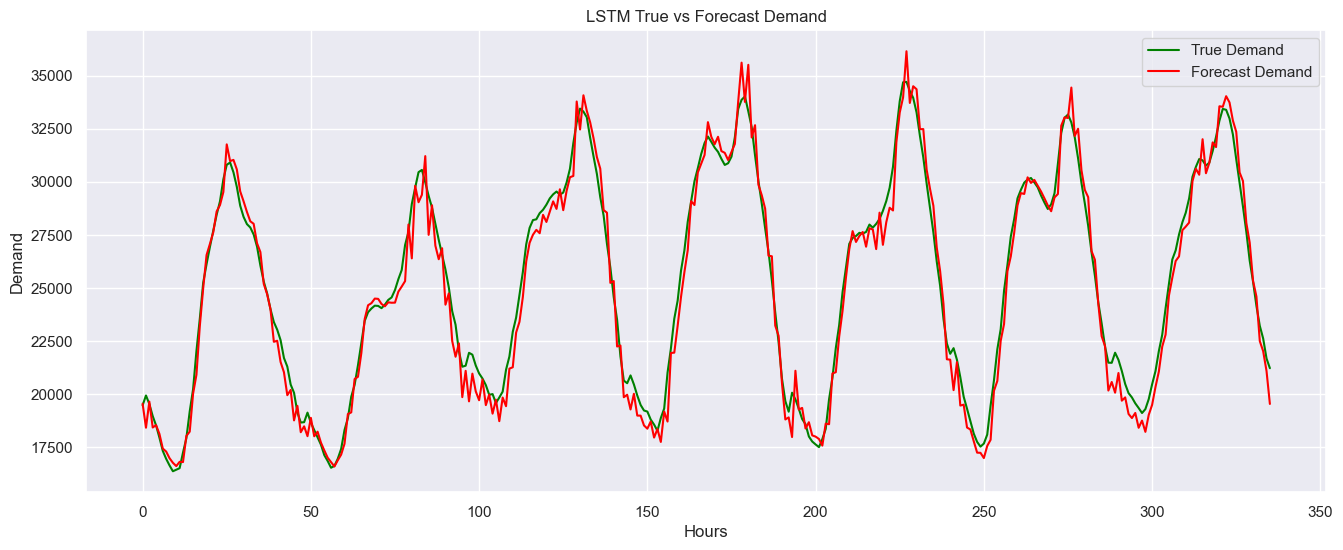

In [103]:
plt.figure(figsize = (16, 6))
plt.plot(True_Demand, label='True Demand', color='green')
plt.plot(LSTM_Predicted_Demand, label='Forecast Demand', color='red')
plt.xlabel('Hours')
plt.ylabel('Demand')
plt.title('LSTM True vs Forecast Demand')
plt.legend()
plt.show()

**CNN-LSTM**

In [104]:
#Passing to CNN-LSTM Model 
CNN_LSTM_predicted_demand = cnn_lstm.predict(X_test)
#Doing inverse Transformation to get Values 
CNN_LSTM_predicted_demand = scaler.inverse_transform(CNN_LSTM_predicted_demand)

11/11 [==============================] - 1s 43ms/step


In [105]:
True_Demand2 = Testdemanddata_df['NATIONAL_DEMAND'].to_list()
CNN_LSTM_Predicted_Demand  = CNN_LSTM_predicted_demand
Dates = Testdemanddata_df.index.to_list()

In [106]:
Demand_df2 = pd.DataFrame(data={
    'Date':Dates,
    'TrueDemand2': True_Demand2,
    'PredictedDemand':[x[0] for x in CNN_LSTM_Predicted_Demand ]
})

In [107]:
Demand_df2

Date  TrueDemand2  PredictedDemand
0   2022-12-25        19484     20034.779297
1   2022-12-25        19946     19668.951172
2   2022-12-25        19545     20171.398438
3   2022-12-25        18976     19464.513672
4   2022-12-25        18537     18769.300781
..         ...          ...              ...
331 2022-12-31        24160     27756.894531
332 2022-12-31        23223     25827.746094
333 2022-12-31        22627     24529.361328
334 2022-12-31        21690     23783.503906
335 2022-12-31        21229     22307.904297

[336 rows x 3 columns]

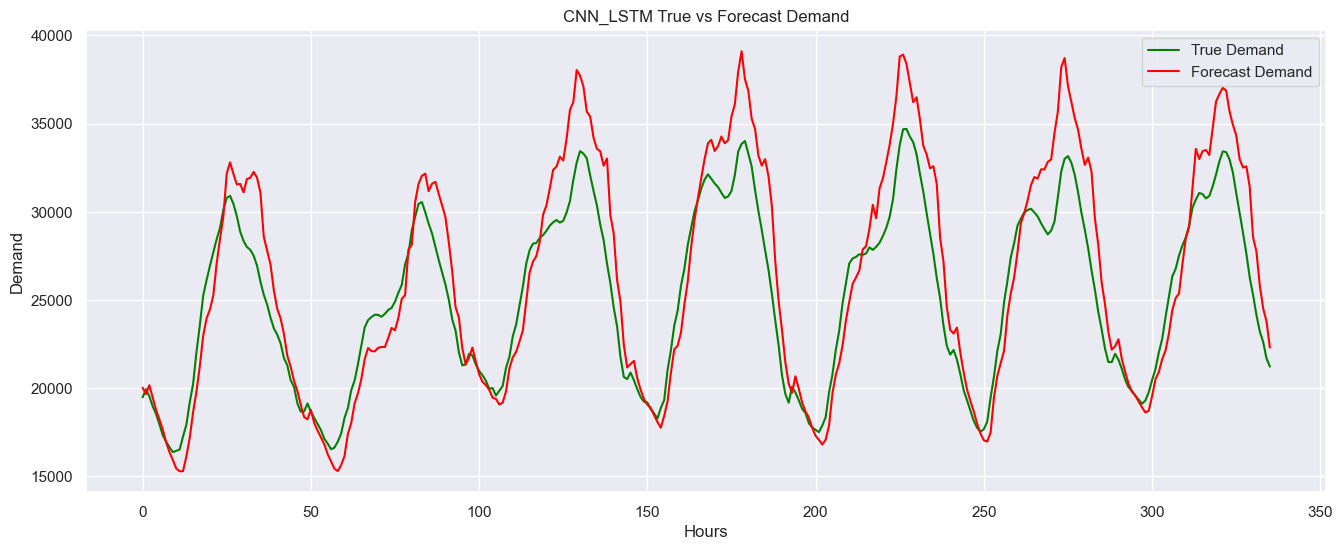

In [108]:
plt.figure(figsize = (16, 6))
plt.plot(True_Demand2, label='True Demand', color='green')
plt.plot(CNN_LSTM_Predicted_Demand, label='Forecast Demand', color='red')
plt.xlabel('Hours')
plt.ylabel('Demand')
plt.title('CNN_LSTM True vs Forecast Demand')
plt.legend()
plt.show()

**PLOTTING EVALUATION METRICS**

In [109]:
metrics= {
    'Models': ['LSTM','CNN_LSTM'],
    'MSE': [LSTM_MSE,  CNN_LSTM_MSE],
    'RMSE': [LSTM_RMSE, CNN_LSTM_RMSE],
    'MASE': [LSTM_MASE, CNN_LSTM_MASE],
    'MAPE': [LSTM_MAPE, CNN_LSTM_MAPE],
    'R2_Score': [LSTM_r2, CNN_LSTM_r2],
    'Training Time': [total_training_time_lstm, total_training_time_cnn_lstm]
}

In [110]:
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Models', inplace=True)
metrics_df = (metrics_df).round(4)
metrics_df

MSE    RMSE    MASE    MAPE  R2_Score  Training Time
Models                                                           
LSTM      0.0037  0.0608 -0.0467  0.3551    0.9951       399.0904
CNN_LSTM  0.0047  0.0685 -0.0549  0.3699    0.9935       113.1161

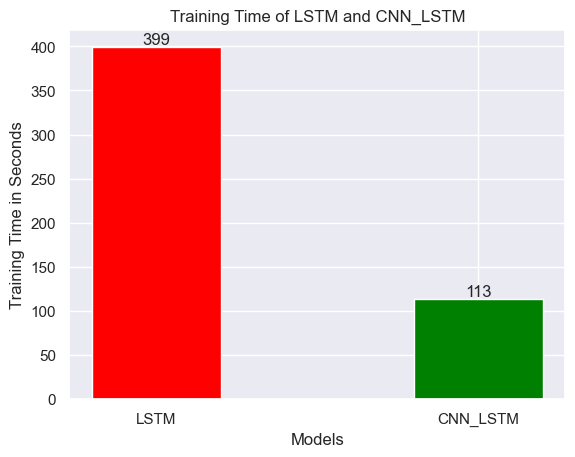

In [111]:
plots = plt.bar(metrics_df.index, metrics_df['Training Time'], color=['red', 'green'],  width=0.4)
plt.xlabel('Models')
plt.ylabel('Training Time in Seconds')
plt.title('Training Time of LSTM and CNN_LSTM')

for i, value in enumerate(metrics_df['Training Time']):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')

plt.show()

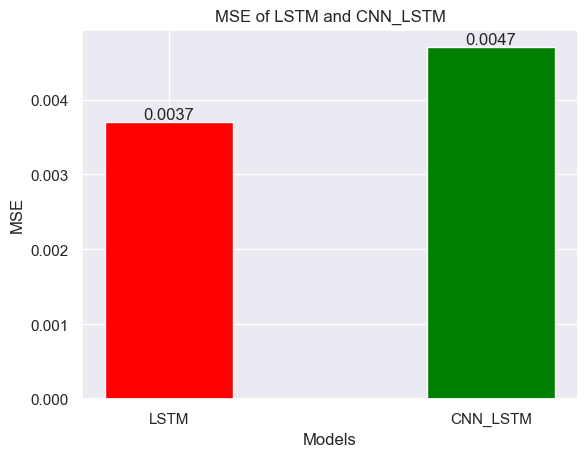

In [112]:
plots = plt.bar(metrics_df.index, metrics_df['MSE'], color=['red', 'green'],  width=0.4)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE of LSTM and CNN_LSTM')

for i, value in enumerate(metrics_df['MSE']):
    plt.text(i, value, f'{value:.4f}', ha='center', va='bottom')

plt.show()

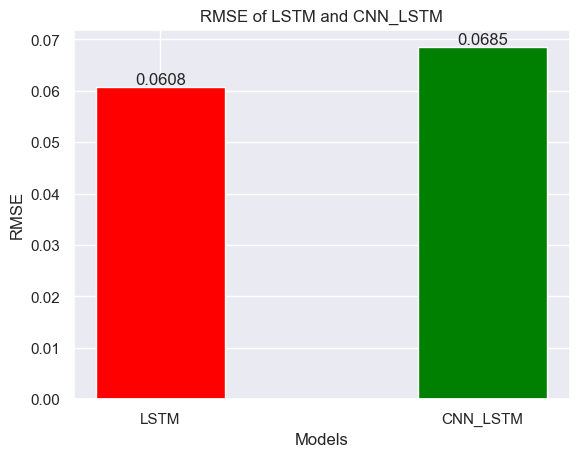

In [113]:
plt.bar(metrics_df.index, metrics_df['RMSE'], color=['red', 'green'], width=0.4)


plt.xlabel('Models')                 
plt.ylabel('RMSE')                   
plt.title('RMSE of LSTM and CNN_LSTM')


for i, value in enumerate(metrics_df['RMSE']):
    plt.text(i, value, f'{value:.4f}', ha='center', va='bottom')


plt.show()

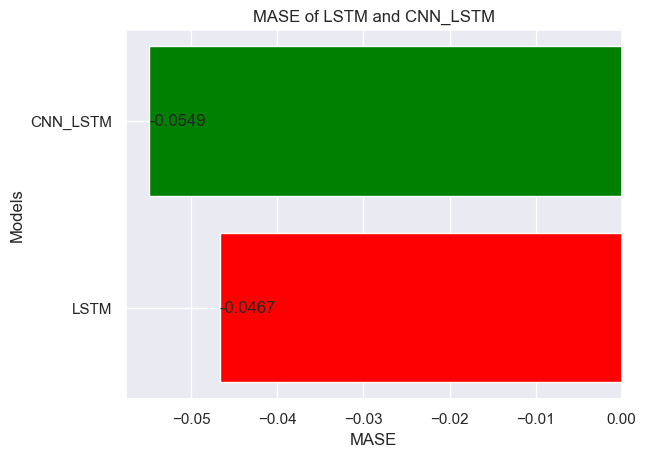

In [114]:
plt.barh(metrics_df.index, metrics_df['MASE'], color=['red', 'green'])


plt.xlabel('MASE')                 
plt.ylabel('Models')               
plt.title('MASE of LSTM and CNN_LSTM')  


for i, value in enumerate(metrics_df['MASE']):
    plt.text(value, i, f'{value:.4f}', ha='left', va='center')


plt.show()

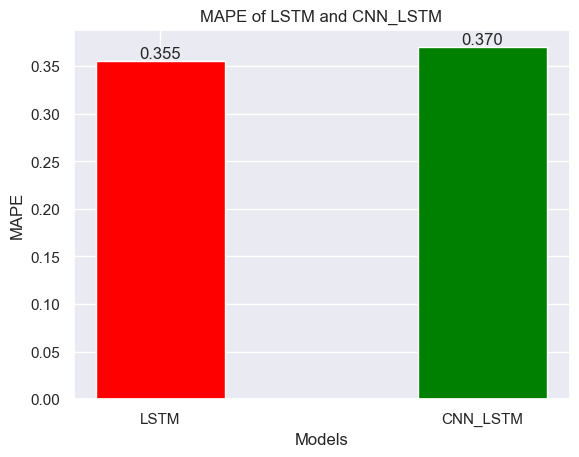

In [115]:
plt.bar(metrics_df.index, metrics_df['MAPE'], color=['red', 'green'], width=0.4)


plt.xlabel('Models')                
plt.ylabel('MAPE')                  
plt.title('MAPE of LSTM and CNN_LSTM')


for i, value in enumerate(metrics_df['MAPE']):
    plt.text(i, value, f'{value:.3f}', ha='center', va='bottom')


plt.show()

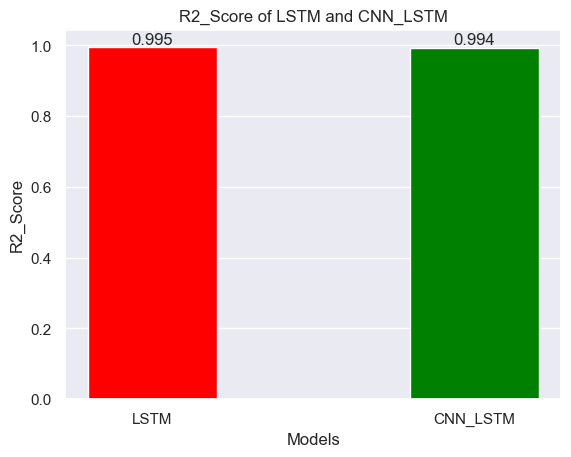

In [116]:
plt.bar(metrics_df.index, metrics_df['R2_Score'], color=['red', 'green'], width=0.4)

plt.xlabel('Models')                 
plt.ylabel('R2_Score')               
plt.title('R2_Score of LSTM and CNN_LSTM')  


for i, value in enumerate(metrics_df['R2_Score']):
    plt.text(i, value, f'{value:.3f}', ha='center', va='bottom')

plt.show()


**Distribution of Predicted Values for LSTM**

<AxesSubplot:title={'center':'ForecastedDemand'}, xlabel='ForecastedDemand', ylabel='Density'>

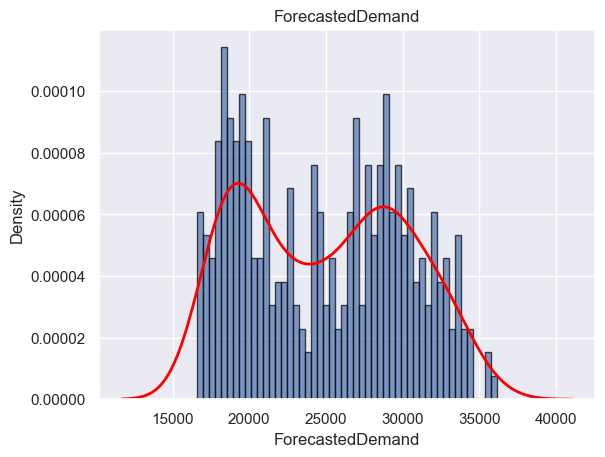

In [124]:
Demand_df.hist('ForecastedDemand', bins=50, edgecolor='black', alpha=0.7, density=True)  # density=True for normalized histogram
sns.kdeplot(Demand_df['ForecastedDemand'], color='red', linewidth=2)

**Distribution of Predicted Values for CNN-LSTM**

Text(0.5, 1.0, 'Distribution of True Demand for CNN-LSTM')

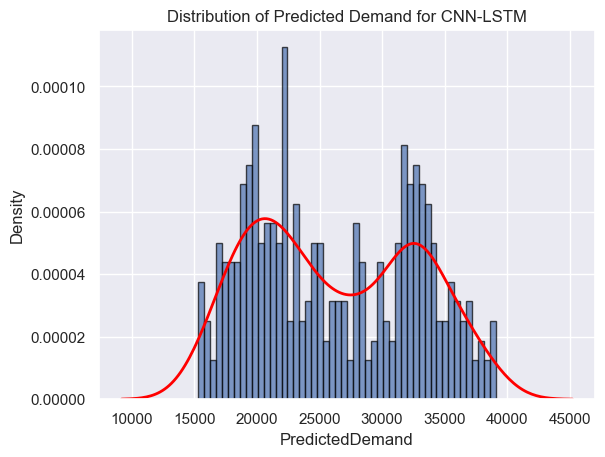

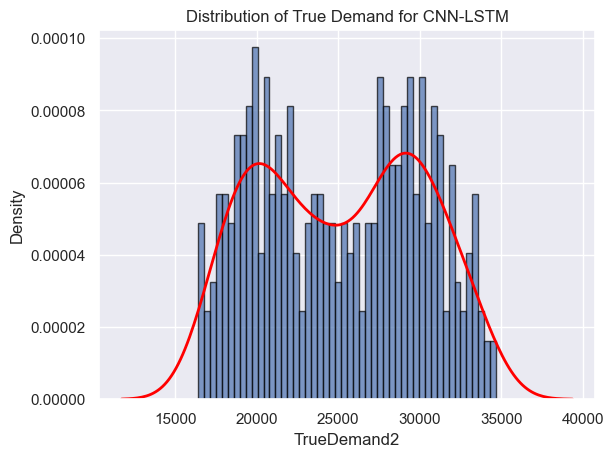

In [126]:
Demand_df2.hist('PredictedDemand', bins=50, edgecolor='black', alpha=0.7, density=True)  
sns.kdeplot(Demand_df2['PredictedDemand'], color='red', linewidth=2)
plt.title('Distribution of Predicted Demand for CNN-LSTM')

'TrueDemand2'
Demand_df2.hist('TrueDemand2', bins=50, edgecolor='black', alpha=0.7, density=True)  
sns.kdeplot(Demand_df2['TrueDemand2'], color='red', linewidth=2) 
plt.title('Distribution of True Demand for CNN-LSTM')